In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns
import warnings
from typing import List, Tuple, Dict, Sequence, Union
from scipy import stats as st
from scipy.stats import norm

In [147]:
%matplotlib inline
sns.set_theme(style="whitegrid")
warnings.filterwarnings('ignore')

In [148]:
pd.options.display.max_rows=100
pd.options.display.max_columns=100
pd.options.display.max_colwidth=-1

In [149]:
data = pd.read_csv('Z-Alizadehsanidataset.csv')

In [150]:

data.shape

(303, 56)

In [151]:
#top5 records
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,BBB,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,Y,N,N,N,N,N,Y,110,80,0,N,N,N,N,0,N,0,N,N,N,N,0,0,1,1,N,N,N,90,0.7,250,155,30.0,8,7,15.6,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,Y,N,N,N,N,N,N,140,80,1,N,N,N,N,1,N,0,N,N,N,N,0,0,1,1,N,N,N,80,1.0,309,121,36.0,30,26,13.9,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,N,N,N,N,N,N,N,100,100,0,N,N,N,N,1,N,0,N,N,N,N,0,0,0,0,N,N,N,85,1.0,103,70,45.0,17,10,13.5,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,Y,N,N,N,N,N,N,100,80,0,N,N,N,Y,0,Y,3,N,Y,N,N,0,0,1,0,N,N,N,78,1.2,63,55,27.0,30,76,12.1,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,Y,N,N,N,N,N,N,110,80,0,N,N,Y,N,0,Y,2,N,N,N,N,0,0,0,0,N,N,N,104,1.0,170,110,50.0,16,27,13.2,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [152]:
data.columns

Index(['Age', 'Weight', 'Length', 'Sex', 'BMI', 'DM', 'HTN', 'Current Smoker',
       'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA', 'Airway disease',
       'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
       'Weak Peripheral Pulse', 'Lung rales', 'Systolic Murmur',
       'Diastolic Murmur', 'Typical Chest Pain', 'Dyspnea', 'Function Class',
       'Atypical', 'Nonanginal', 'Exertional CP', 'LowTH Ang', 'Q Wave',
       'St Elevation', 'St Depression', 'Tinversion', 'LVH',
       'Poor R Progression', 'BBB', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN',
       'ESR', 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE',
       'Region RWMA', 'VHD', 'Cath'],
      dtype='object')

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

In [154]:
data.describe()

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,PR,Edema,Typical Chest Pain,Function Class,Q Wave,St Elevation,St Depression,Tinversion,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,75.141914,0.039604,0.541254,0.663366,0.052805,0.046205,0.234323,0.297030,119.184818,1.055611,150.343234,104.643564,40.233993,17.501650,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,8.911801,0.195350,0.499120,1.032042,0.224015,0.210275,0.424276,0.457706,52.079653,0.264296,97.959451,35.396688,10.559077,6.956761,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,0.500000,37.000000,18.000000,15.900000,6.000000,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,88.500000,0.900000,90.000000,80.000000,33.500000,13.000000,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,1.000000,122.000000,100.000000,39.000000,16.000000,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,80.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,130.000000,1.200000,177.000000,122.000000,45.500000,20.000000,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,110.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,400.000000,2.200000,1050.000000,232.000000,111.000000,52.000000,90.000000,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000


In [155]:
#Finding Duplicate Rows Across All Columns

print("Duplicate Rows:",len(data[data.duplicated()]))
data[data.duplicated()]

Duplicate Rows: 0


,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,Obesity,CRF,CVA,Airway disease,Thyroid Disease,CHF,DLP,BP,PR,Edema,Weak Peripheral Pulse,Lung rales,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Q Wave,St Elevation,St Depression,Tinversion,LVH,Poor R Progression,BBB,FBS,CR,TG,LDL,HDL,BUN,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath



<B> No duplicated row's present in the data <B>

In [156]:
def profile_dataset(df: pd.DataFrame)->Tuple[pd.DataFrame, pd.DataFrame]:
    '''
    takes dataframe as input and return numerical and non numerical summary as separate datframes
    input
    df: pandas dataframe
    returns
    numerical_summary: numerical sumamary
    non_numerical_summary: non numerical summary
    '''
    
    num_df = df.select_dtypes(exclude='object')
    non_num_df = df.select_dtypes(include='object')
    
    
    nuniq = lambda data,col: data[col].nunique()
    draw_uniq_samples = lambda data,col: data[col].sort_values().unique().tolist()
    missing_pct = lambda data,col: (data[col].isnull().sum()/data.shape[0])*100
    mode = lambda data,col: data[col].mode().tolist()
    top_five = lambda data,col: data[col].value_counts().head(5).index.tolist()
    
    
    num_df_summary = num_df.describe().T
    num_df_add_nuniq_summ = pd.Series([nuniq(num_df,col) for col in num_df.columns],name='unique',index=num_df.columns)
    num_df_add_uniq_samples = pd.Series([draw_uniq_samples(num_df,col) for col in num_df.columns],name='unique_samples',index=num_df.columns)[:10]
    num_df_add_missing_summ = pd.Series([missing_pct(num_df,col) for col in num_df.columns],name='missing_pct',index=num_df.columns)
    num_df_add_mode_summ = pd.Series([mode(num_df,col) for col in num_df.columns],name='top',index=num_df.columns)
    num_df_add_top_five_summ = pd.Series([top_five(num_df,col) for col in num_df.columns],name='top_five',index=num_df.columns)
    num_df_add_dtype_summ = pd.Series(num_df.dtypes,name='dtype',index=num_df.columns)
    
    
    non_num_df_summary = non_num_df.describe().T
    non_num_df_add_missing_summ = pd.Series([missing_pct(non_num_df,col) for col in non_num_df.columns],name='missing_pct',index=non_num_df.columns)
    non_num_df_add_uniq_samples = pd.Series([non_num_df[col].astype('str').sort_values().unique().tolist() \
                                             for col in non_num_df.columns],name='unique_samples',index=non_num_df.columns)[:10]
    non_num_df_add_top_five_summ = pd.Series([top_five(non_num_df,col) for col in non_num_df.columns],name='top_five',index=non_num_df.columns)


    numerical_summary =  pd.concat([num_df_summary,num_df_add_nuniq_summ,num_df_add_uniq_samples,
                      num_df_add_missing_summ,num_df_add_mode_summ,num_df_add_top_five_summ,
                      num_df_add_dtype_summ],axis=1,ignore_index=False).sort_values(by=['missing_pct'],ascending=False)
    
    non_numerical_summary = pd.concat([non_num_df_summary,non_num_df_add_missing_summ,
                                       non_num_df_add_uniq_samples,non_num_df_add_top_five_summ],axis=1).sort_values(by=['missing_pct'],ascending=False)
    
    return numerical_summary, non_numerical_summary

In [157]:
#create profile summary
%time
num_sum_df, non_num_sum_df = profile_dataset(data)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.82 µs


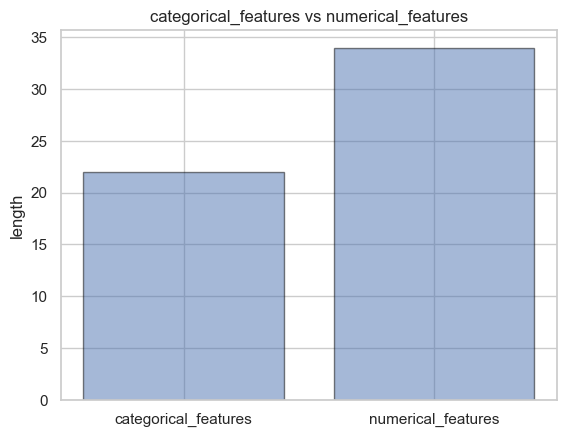

In [158]:
#categorical_features vs numerical_features

objects = ('categorical_features', 'numerical_features')
y_pos = np.arange(len(objects))
performance = [len(non_num_sum_df),len(num_sum_df)]

plt.bar(y_pos, performance, align='center', alpha=0.5,edgecolor="black")
plt.xticks(y_pos, objects)
plt.ylabel('length')
plt.title('categorical_features vs numerical_features')

plt.show()



The above graph, indicates that in the current dataset <B> numerical features </B> are high in number compare to categorical_features 

<BR>


### Categorical Features

<BR>

In [159]:
categorical_feature = data[non_num_sum_df.T.columns]

In [160]:
categorical_feature.head()

,Sex,Obesity,VHD,BBB,Poor R Progression,LVH,LowTH Ang,Exertional CP,Nonanginal,Atypical,Dyspnea,Diastolic Murmur,Systolic Murmur,Lung rales,Weak Peripheral Pulse,DLP,CHF,Thyroid Disease,Airway disease,CVA,CRF,Cath
0,Male,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,Cad
1,Fmale,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Cad
2,Male,N,mild,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Cad
3,Fmale,Y,Severe,N,N,N,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,Normal
4,Fmale,Y,Severe,N,N,N,N,N,N,N,Y,N,Y,N,N,N,N,N,N,N,N,Normal


In [161]:
non_num_sum_df

,count,unique,top,freq,missing_pct,unique_samples,top_five
Sex,303,2,Male,176,0.0,"[Fmale, Male]","[Male, Fmale]"
Obesity,303,2,Y,211,0.0,"[N, Y]","[Y, N]"
VHD,303,4,mild,149,0.0,NaN,"[mild, N, Moderate, Severe]"
BBB,303,3,N,282,0.0,NaN,"[N, LBBB, RBBB]"
Poor R Progression,303,2,N,294,0.0,NaN,"[N, Y]"
LVH,303,2,N,283,0.0,NaN,"[N, Y]"
LowTH Ang,303,2,N,301,0.0,NaN,"[N, Y]"
Exertional CP,303,1,N,303,0.0,NaN,[N]
Nonanginal,303,2,N,287,0.0,NaN,"[N, Y]"
Atypical,303,2,N,210,0.0,NaN,"[N, Y]"


#### From the above information, it show's that
1. The categorical_feature does not contain any NaN values

2. Spelling mistake in sex column -(fmale)

3. Contains zero varaince feature (Exertional CP), need to drop this column

4. In column 'VHD' , 'BBB', there is value N, wherther this N denotes NO or some other value??

In [162]:
# categorical_feature analysis

Sex


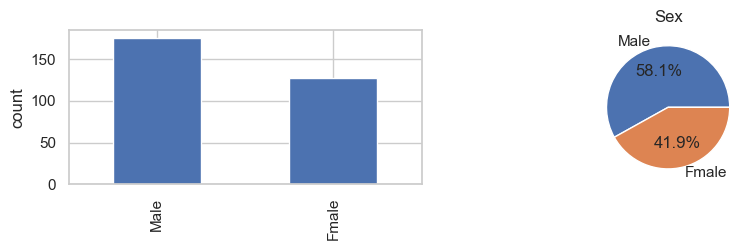

Obesity


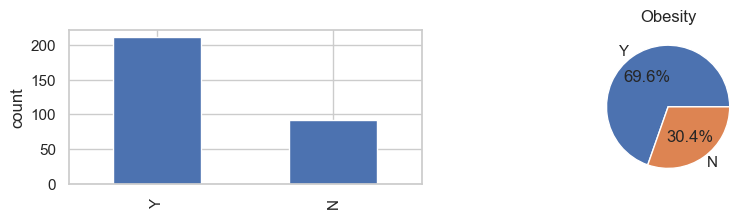

VHD


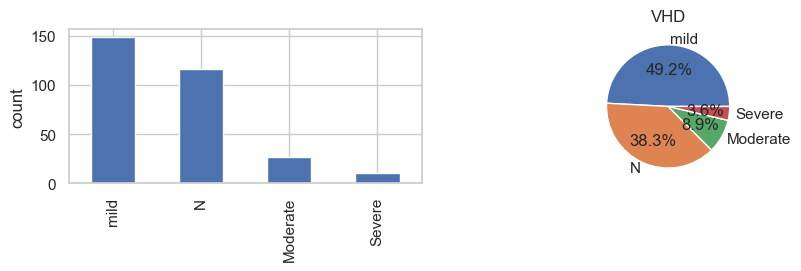

BBB


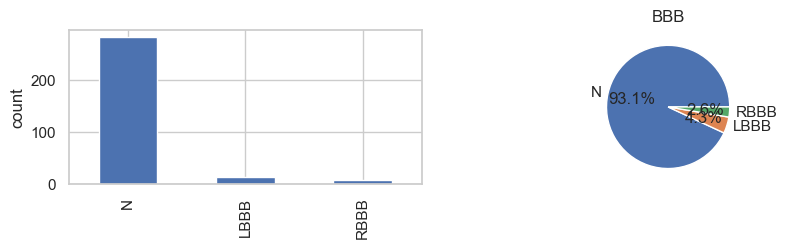

Poor R Progression


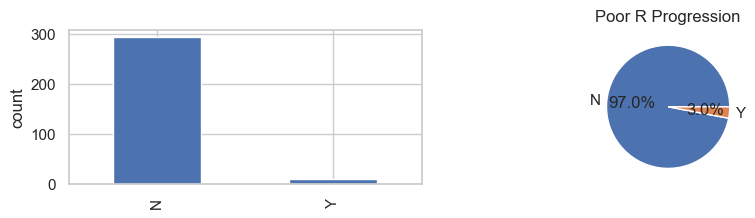

LVH


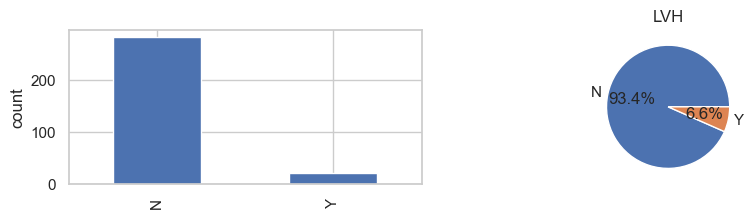

LowTH Ang


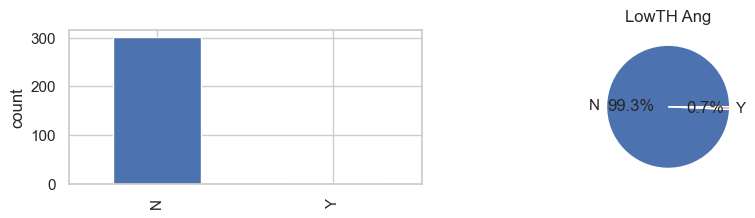

Exertional CP


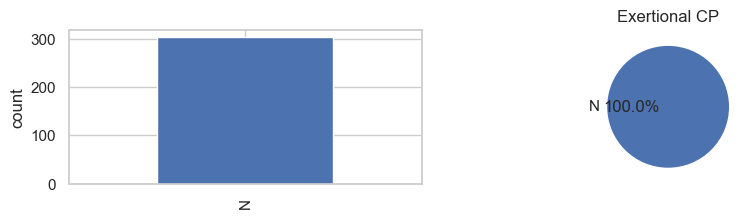

Nonanginal


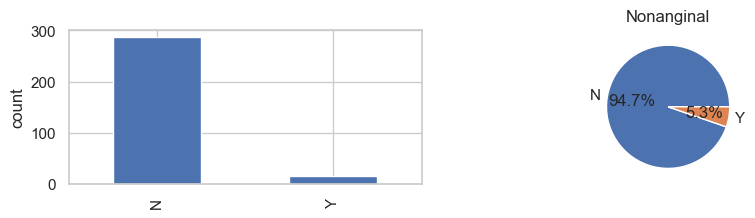

Atypical


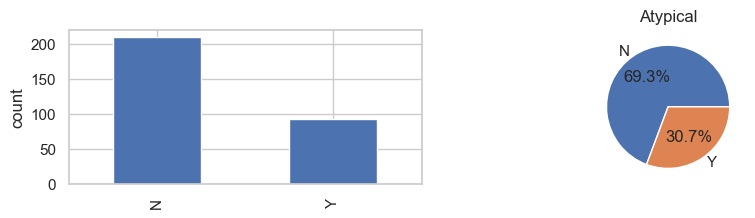

Dyspnea


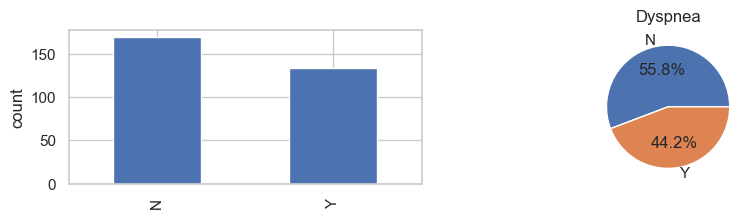

Diastolic Murmur


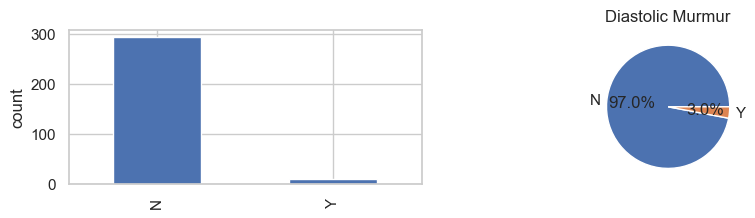

Systolic Murmur


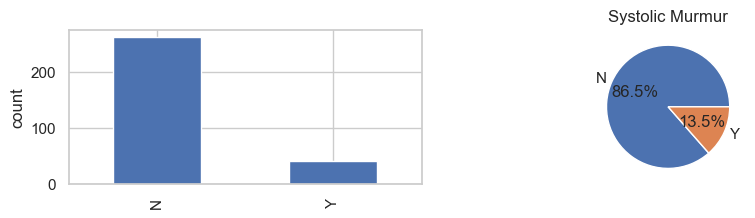

Lung rales


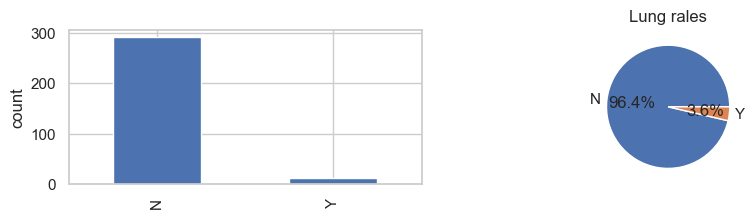

Weak Peripheral Pulse


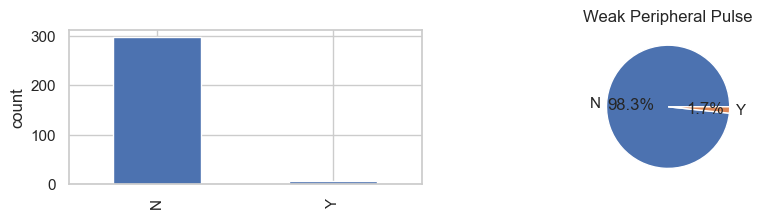

DLP


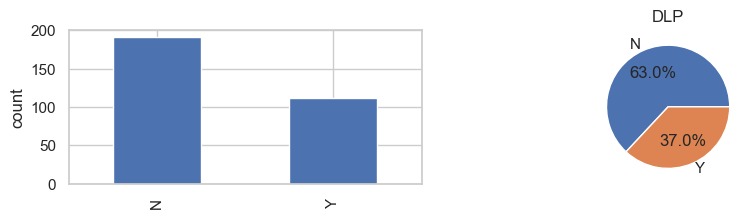

CHF


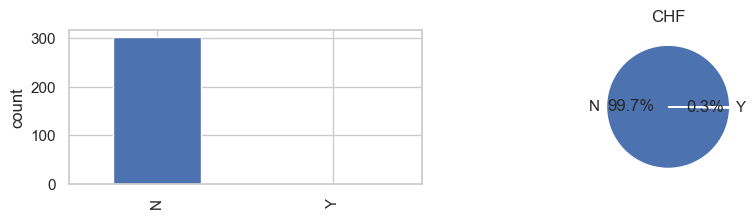

Thyroid Disease


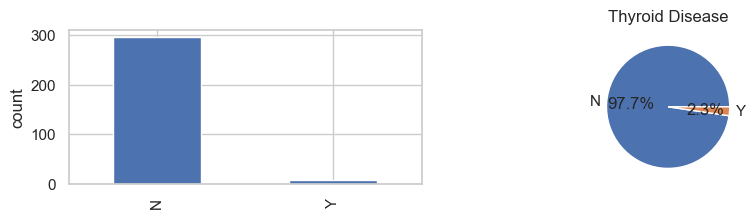

Airway disease


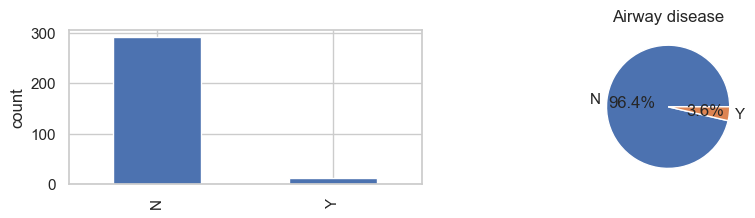

CVA


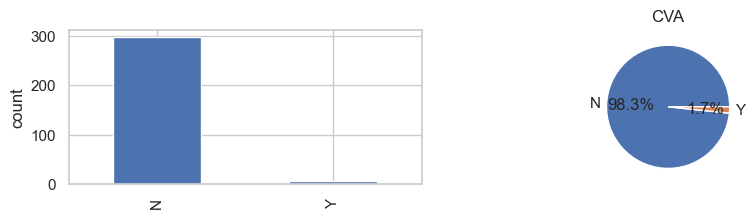

CRF


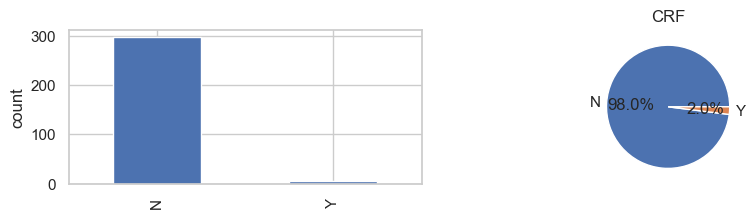

Cath


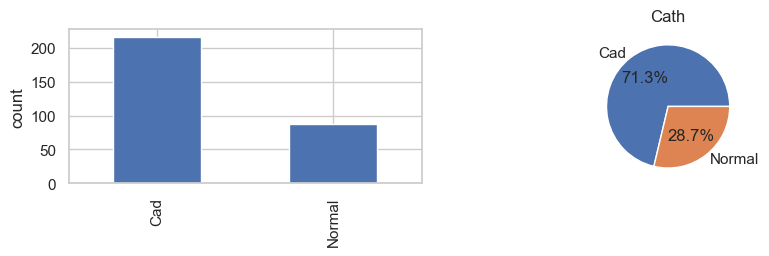

In [163]:
#count plot vs pie chart
for col in categorical_feature:
    print(col)
    plt.figure(figsize = (10, 2))
    plt.subplot(1, 2, 1)
    data[col].value_counts().plot(kind='bar')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    value_counts = data[col].value_counts()
    plt.pie(value_counts,labels = value_counts.index,autopct='%1.1f%%')
    plt.title(col)
    plt.show() 


from the above charts, we can see for some the features <b> 98% </b> of data points are denoating one value(N), we can remove those features from the dataset <b> (CVA, CRF, CHF,Exertional CP , Weak Peripheral Pulse) </b>


<br>

_Target column (CATH)_- - <b> _UNBALANACED in the form of (70,30) ratio_ </b>



### numeric features

In [164]:
num_sum_df

,count,mean,std,min,25%,50%,75%,max,unique,unique_samples,missing_pct,top,top_five,dtype
Age,303.0,58.897690,10.392278,30.000000,51.00000,58.00000,66.000000,86.000000,46,"[30, 36, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 85, 86]",0.0,[55],"[55, 50, 62, 56, 66]",int64
HB,303.0,13.153465,1.610452,8.900000,12.20000,13.20000,14.200000,17.600000,66,NaN,0.0,[11.0],"[11.0, 13.0, 13.1, 13.6, 14.0]",float64
CR,303.0,1.055611,0.264296,0.500000,0.90000,1.00000,1.200000,2.200000,18,NaN,0.0,[1.0],"[1.0, 0.9, 1.1, 0.8, 1.2]",float64
TG,303.0,150.343234,97.959451,37.000000,90.00000,122.00000,177.000000,1050.000000,147,NaN,0.0,[90],"[90, 190, 80, 140, 130]",int64
LDL,303.0,104.643564,35.396688,18.000000,80.00000,100.00000,122.000000,232.000000,110,NaN,0.0,[110],"[110, 90, 112, 70, 75]",int64
HDL,303.0,40.233993,10.559077,15.900000,33.50000,39.00000,45.500000,111.000000,47,NaN,0.0,[44.0],"[44.0, 39.0, 36.0, 30.0, 40.0]",float64
BUN,303.0,17.501650,6.956761,6.000000,13.00000,16.00000,20.000000,52.000000,33,NaN,0.0,"[12, 15]","[12, 15, 17, 14, 16]",int64
ESR,303.0,19.462046,15.936475,1.000000,9.00000,15.00000,26.000000,90.000000,58,NaN,0.0,[12],"[12, 15, 13, 6, 20]",int64
K,303.0,4.230693,0.458202,3.000000,3.90000,4.20000,4.500000,6.600000,27,NaN,0.0,[4.3],"[4.3, 4.4, 4.2, 4.1, 4.0]",float64
Weight,303.0,73.831683,11.987358,48.000000,65.00000,74.00000,81.000000,120.000000,54,"[48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 100, 102, 103, 105, 108, 120]",0.0,[75],"[75, 80, 70, 74, 64]",int64


From the above information, it show's that
1. The numerical_feature does not contain any NaN values


In [165]:
numerical_features = data[num_sum_df.T.columns]

In [166]:
def get_stats_using_IQR(series,verbose=0):
    '''
    return range of IQR
    '''
    # series = series.dropna()
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit  = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR 
    if verbose > 0:
        print(f'IQR :{IQR} lower_limit :{lower_limit} upper_limit:{upper_limit}')
    filtered_data = series[(series>=lower_limit)&(series<=upper_limit)]
    summ = filtered_data.describe([0.25,0.5,0.75,0.95]).T
    summ = pd.Series(dtype='object')
    summ['orig_count'] = series.shape[0]
    summ['upd_count'] = filtered_data.shape[0]
    summ['mean'] = filtered_data.mean()
    summ['min'] = filtered_data.min()
    summ['25%'] = filtered_data.quantile(0.25)
    summ['50%'] = filtered_data.quantile(0.50)
    summ['75%'] = filtered_data.quantile(0.75)
    summ['95%'] = filtered_data.quantile(0.95)
    summ['max'] = filtered_data.max()
    return summ

In [167]:
series_list = []

for i in numerical_features.columns:
    test = get_stats_using_IQR(numerical_features[i])
    series_list.append(test)
    
df = pd.concat(series_list, axis=1)
df.columns = numerical_features.columns
df.T

,orig_count,upd_count,mean,min,25%,50%,75%,95%,max
Age,303.0,303.0,58.897690,30.000000,51.000000,58.000000,66.000000,76.000000,86.000000
HB,303.0,296.0,13.194257,9.400000,12.275000,13.250000,14.200000,15.600000,17.200000
CR,303.0,295.0,1.032373,0.500000,0.900000,1.000000,1.200000,1.400000,1.600000
TG,303.0,287.0,134.526132,37.000000,90.000000,116.000000,167.500000,250.000000,305.000000
LDL,303.0,297.0,102.548822,18.000000,80.000000,100.000000,121.000000,166.200000,180.000000
HDL,303.0,297.0,39.454209,15.900000,33.000000,39.000000,45.000000,54.000000,61.000000
BUN,303.0,286.0,16.300699,6.000000,13.000000,16.000000,19.000000,25.000000,30.000000
ESR,303.0,290.0,17.244828,1.000000,8.250000,14.000000,23.000000,42.000000,51.000000
K,303.0,301.0,4.218272,3.000000,3.900000,4.200000,4.500000,4.900000,5.400000
Weight,303.0,300.0,73.450000,48.000000,65.000000,74.000000,81.000000,92.000000,105.000000



<br>
by seeing the <b> upd_count </b> column, it show's there are some outliers in the numerical feature need to handle those outliers

In [168]:
# graphical representation of numeric features

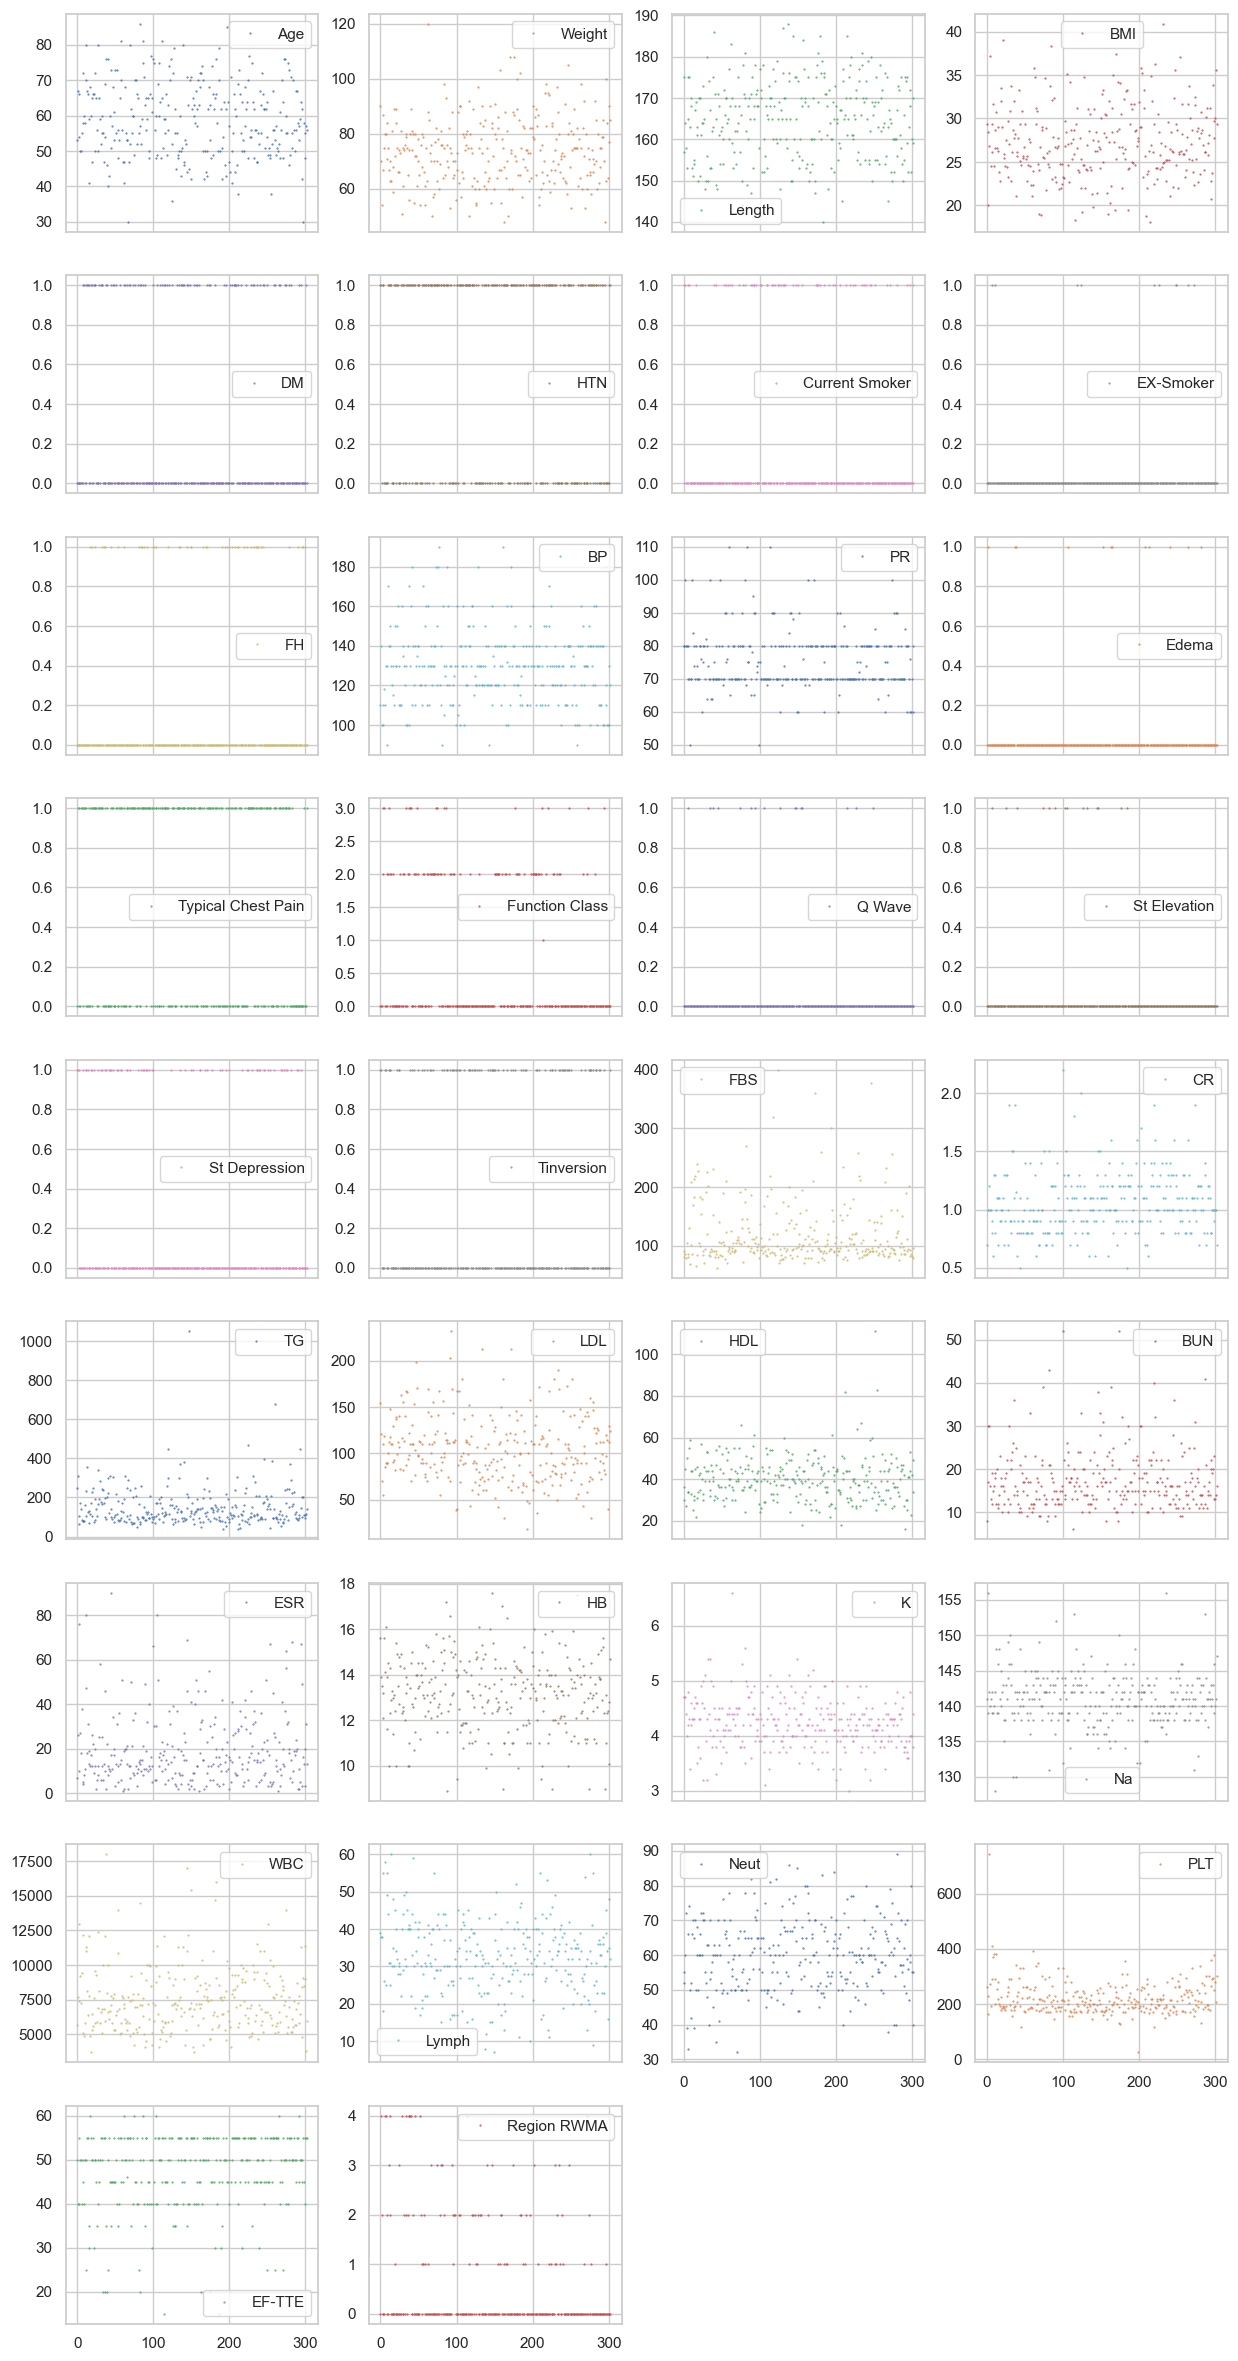

In [169]:
data.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

## Numerical variables are usually of 2 types

Continous variable and Discrete Variables

In [170]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<10]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
data[discrete_feature].head()

Discrete Variables Count: 13


,Tinversion,St Depression,St Elevation,Q Wave,Function Class,Typical Chest Pain,Edema,FH,EX-Smoker,Current Smoker,HTN,DM,Region RWMA
0,1,1,0,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,1,1,0,0,0,1,0,4
2,0,0,0,0,0,1,0,0,0,1,0,0,2
3,0,1,0,0,3,0,0,0,0,0,1,0,0
4,0,0,0,0,2,0,0,0,0,0,1,0,0


In [171]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
data[continuous_feature].head()

Continuous feature Count 21


,Age,HB,CR,TG,LDL,HDL,BUN,ESR,K,Weight,Na,WBC,Lymph,Neut,PLT,EF-TTE,FBS,PR,BP,BMI,Length
0,53,15.6,0.7,250,155,30.0,8,7,4.7,90,141,5700,39,52,261,50,90,80,110,29.387755,175
1,67,13.9,1.0,309,121,36.0,30,26,4.7,70,156,7700,38,55,165,40,80,80,140,28.398718,157
2,54,13.5,1.0,103,70,45.0,17,10,4.7,54,139,7400,38,60,230,40,85,100,100,20.077335,164
3,66,12.1,1.2,63,55,27.0,30,76,4.4,67,142,13000,18,72,742,55,78,80,100,26.838648,158
4,50,13.2,1.0,170,110,50.0,16,27,4.0,87,140,9200,55,39,274,50,104,80,110,37.165193,153


### from the above information, the dataset contains

1. Discrete Variables : 13
2. Continuous feature : 21



In [172]:
# discrete_features and continuous_feature

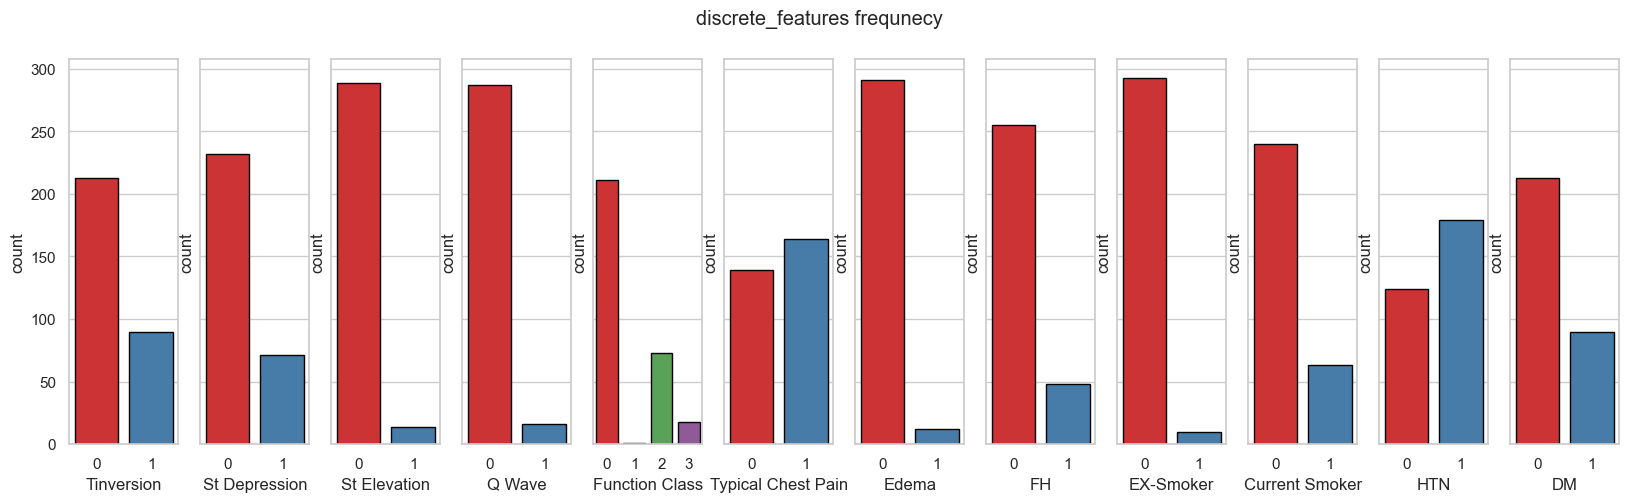

In [173]:
fig, axes = plt.subplots(1, 12, figsize=(20, 5), sharey=True)
fig.suptitle('discrete_features frequnecy')
more_than_one = [ i for i in discrete_feature if data[i].nunique()!=1 ]
for i in range (len(more_than_one)):
    try:
        sns.countplot(ax=axes[i], x=more_than_one[i],data=data,palette='Set1',edgecolor="black")
    except:
        pass

with in the features itself the values are balanced, <b>0 </b>  was dominating in all the features

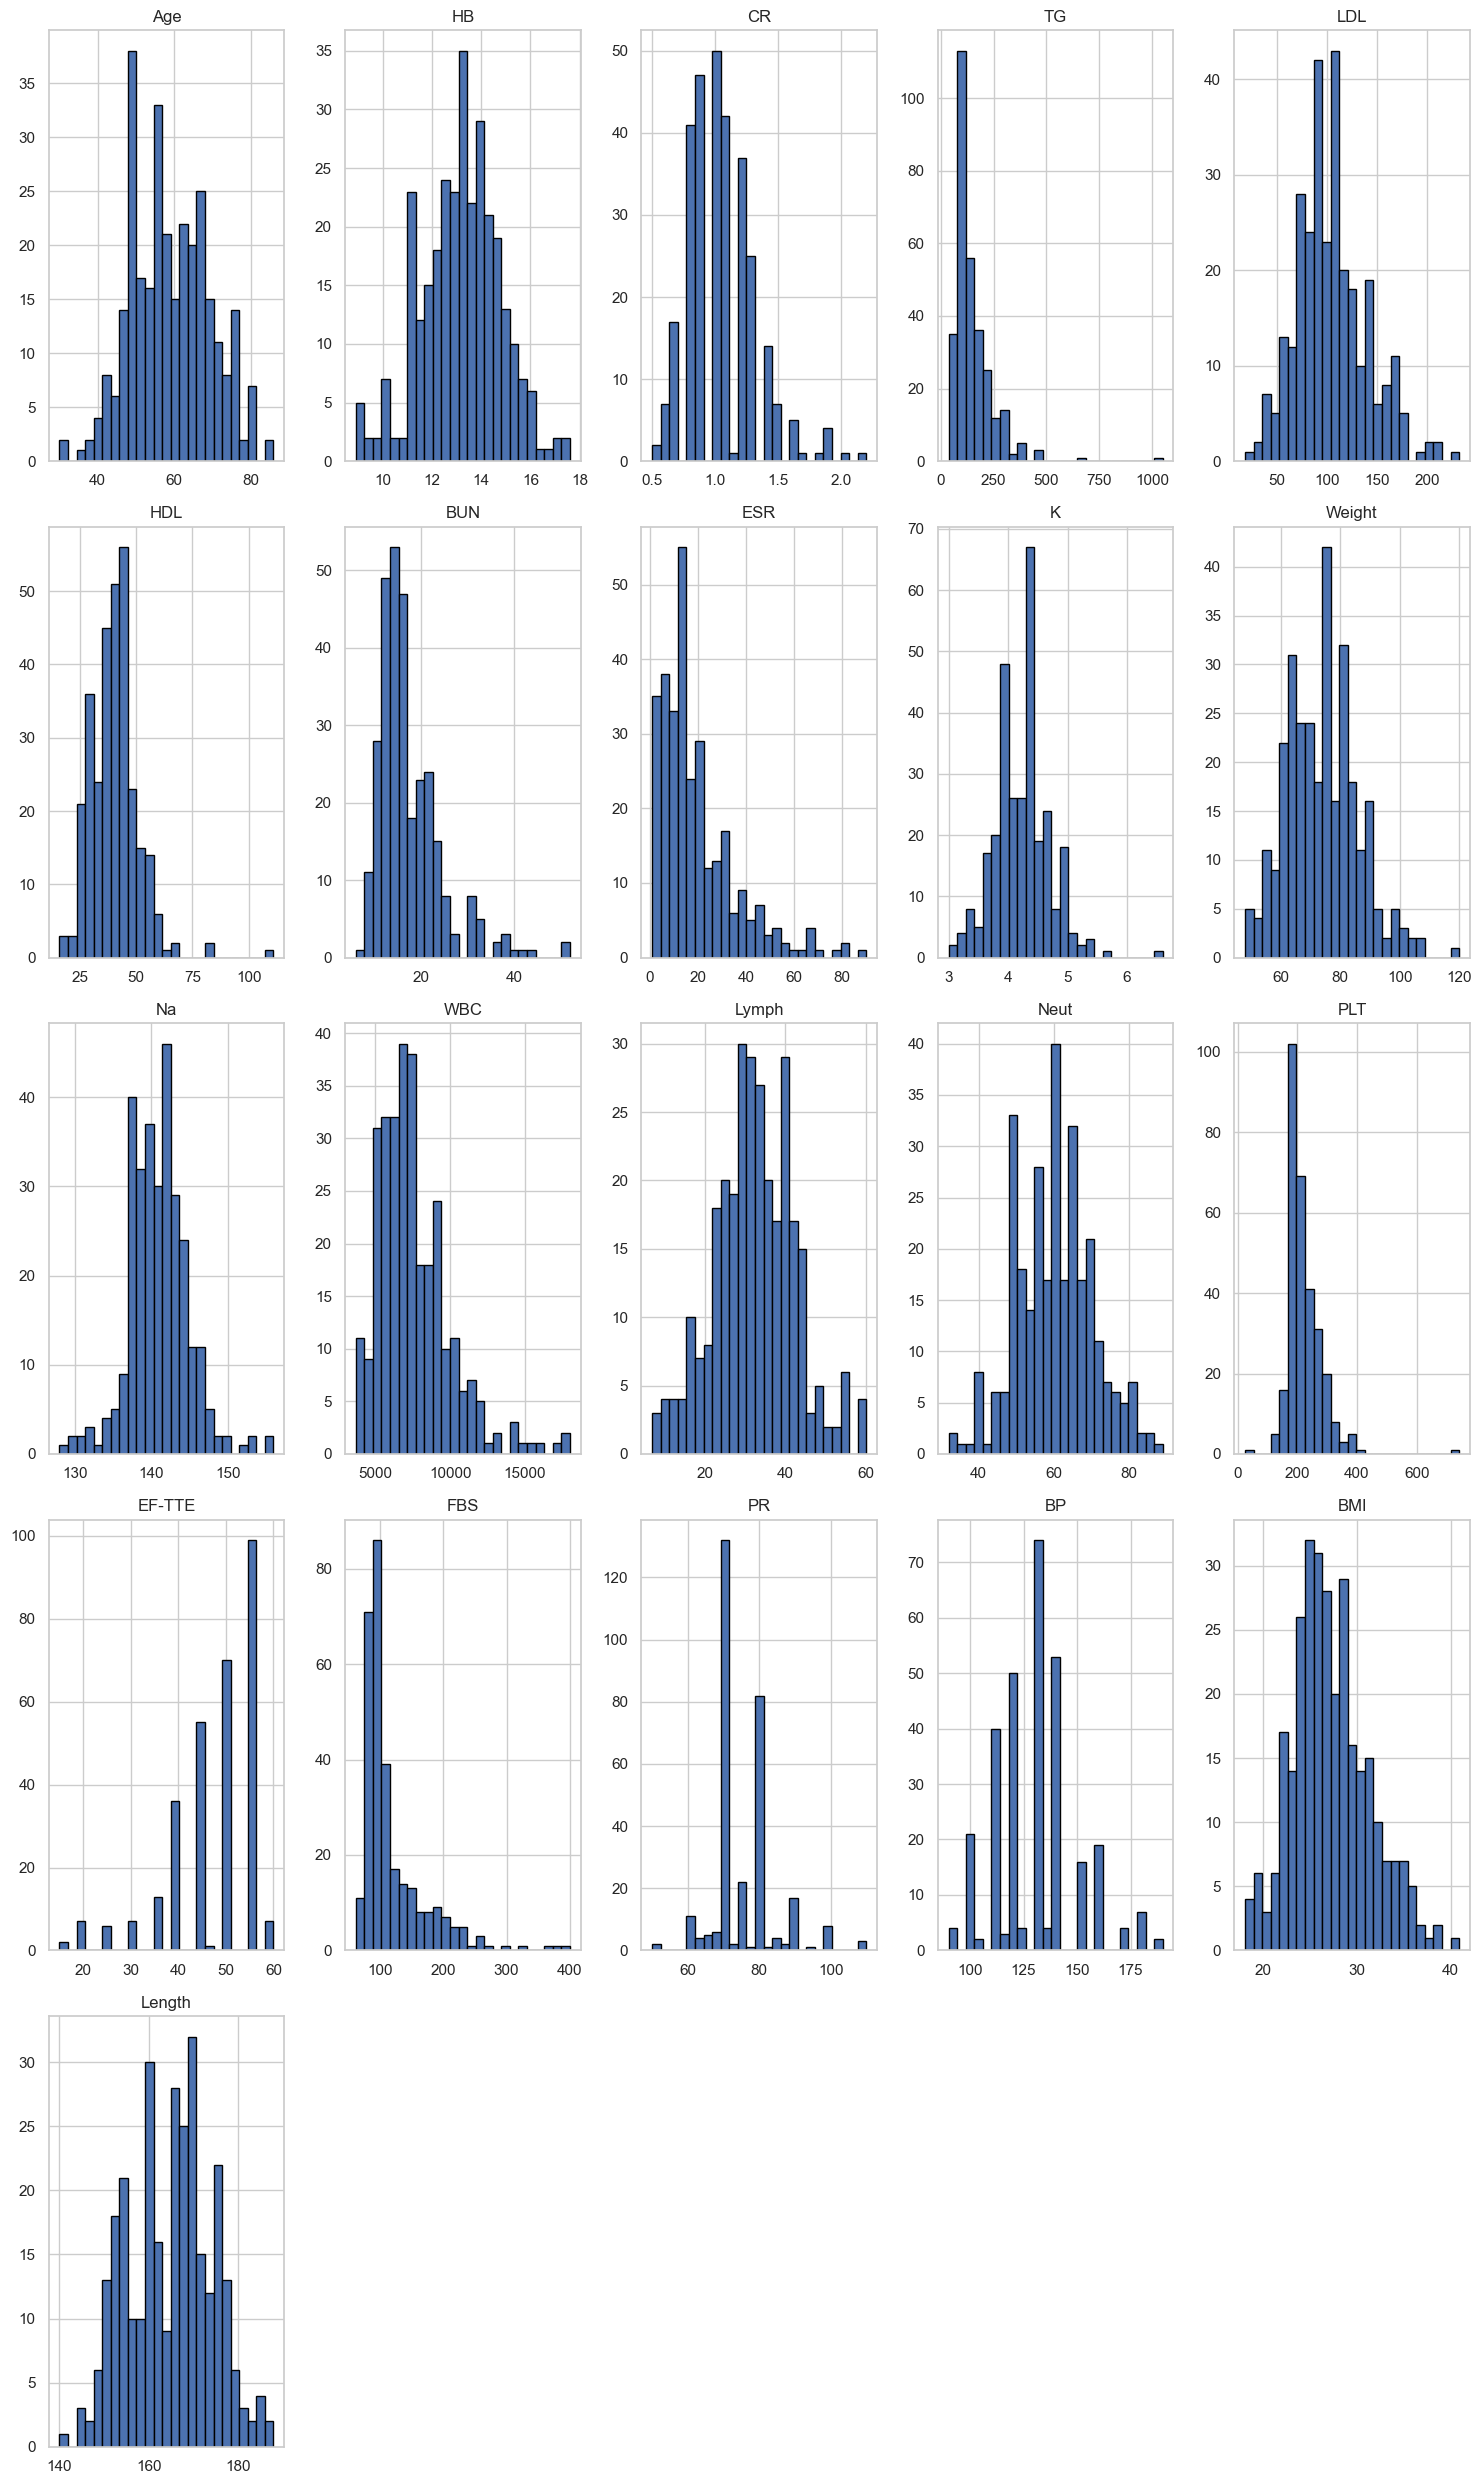

In [174]:
data[continuous_feature].hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

from the above digram,

1. some features following normal distribution 
2. some features are left sweked, right sweked need to normalize those features

In [140]:
#numerial feature analysis

Age


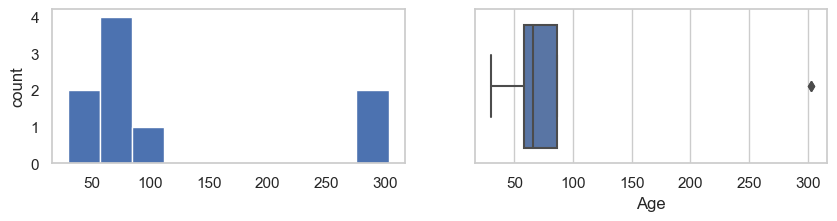

HB


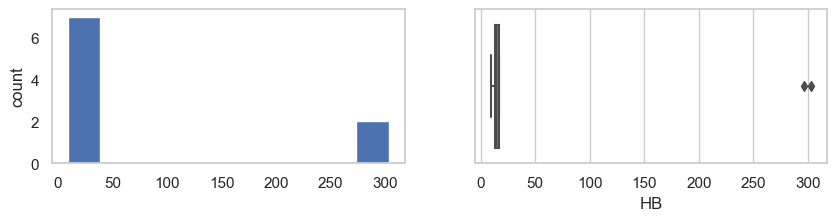

CR


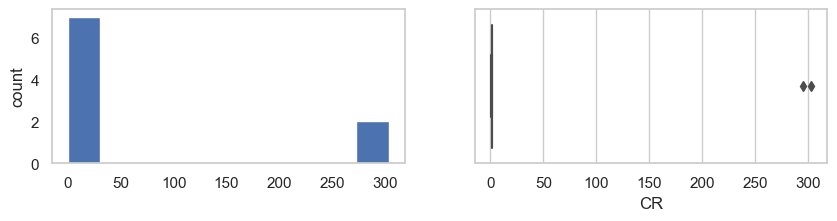

TG


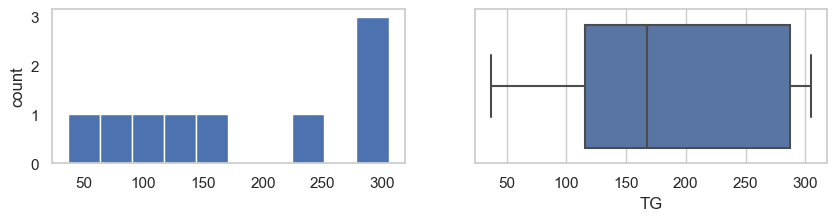

LDL


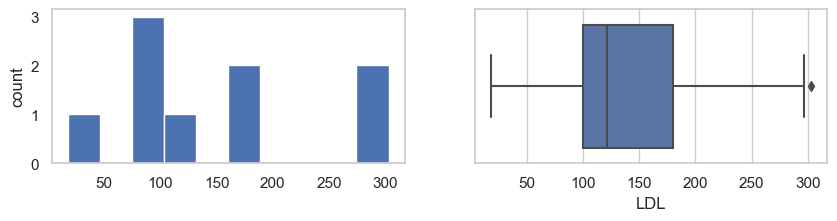

HDL


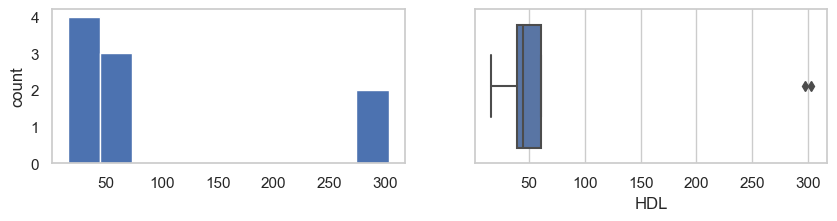

BUN


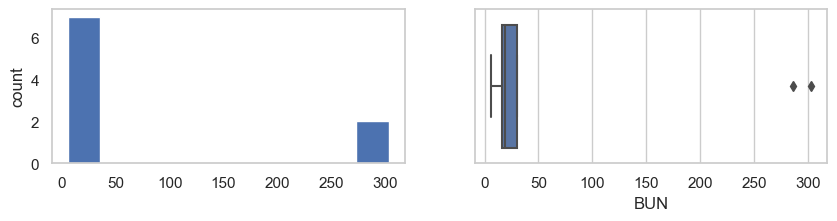

ESR


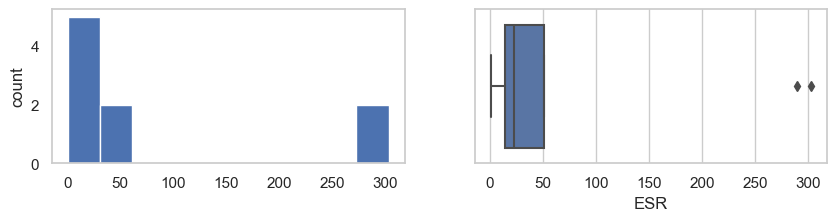

K


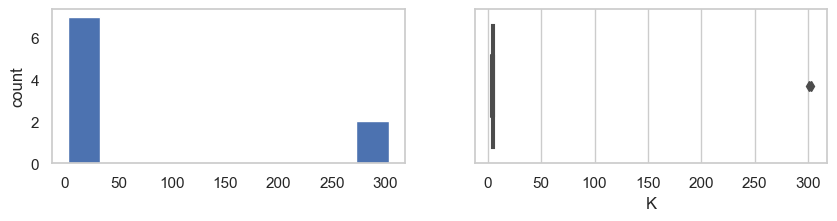

Weight


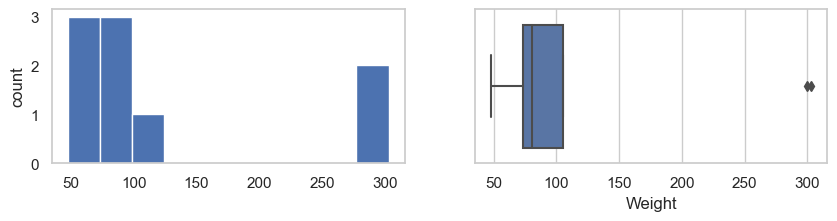

Na


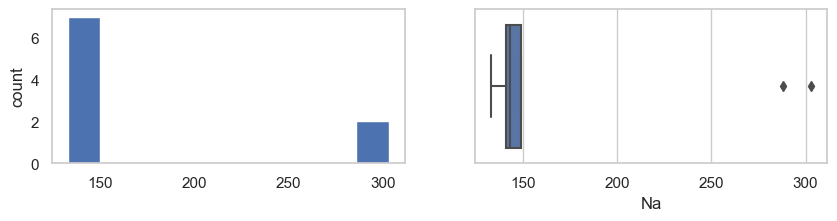

WBC


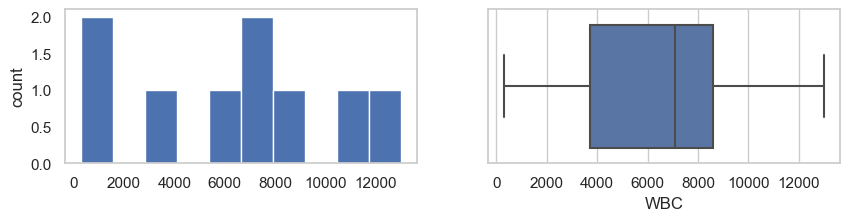

Lymph


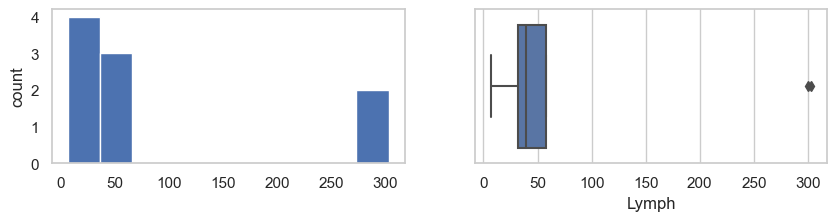

Neut


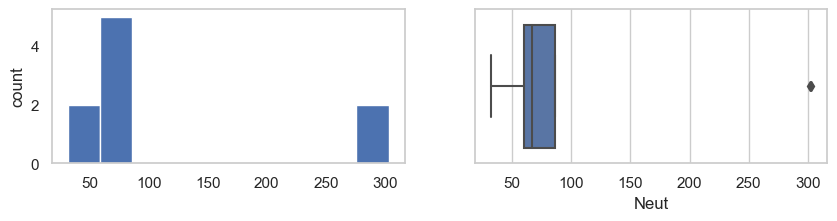

PLT


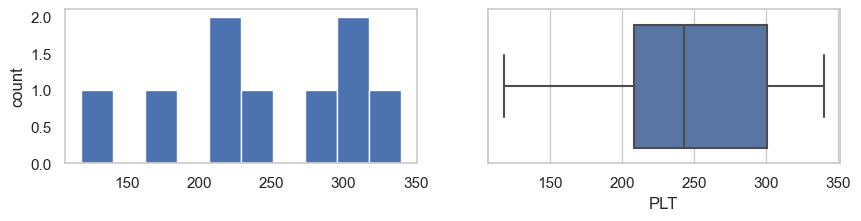

EF-TTE


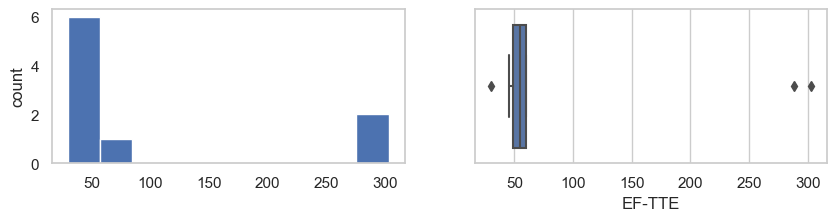

FBS


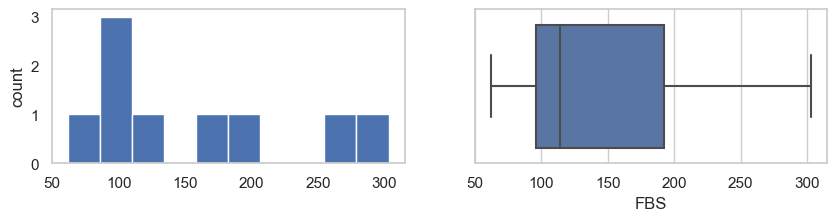

Tinversion


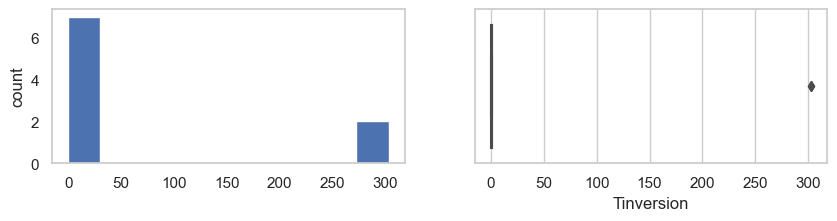

St Depression


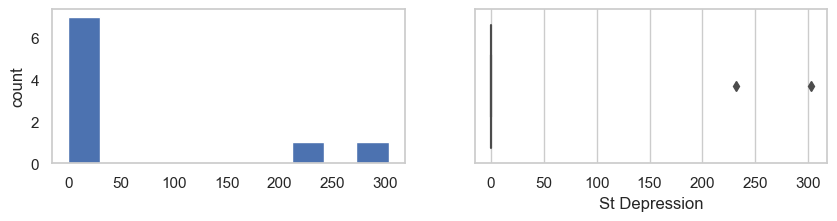

St Elevation


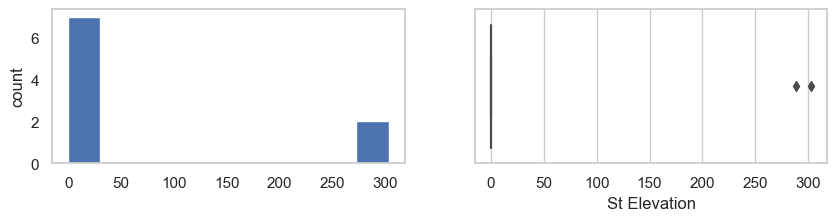

Q Wave


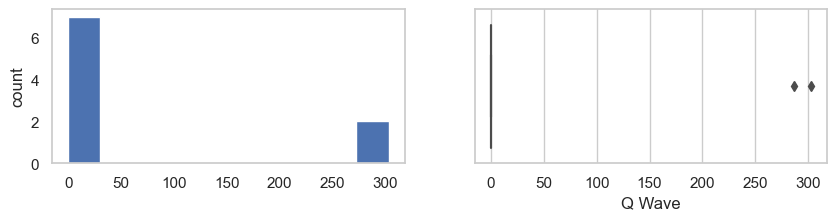

Function Class


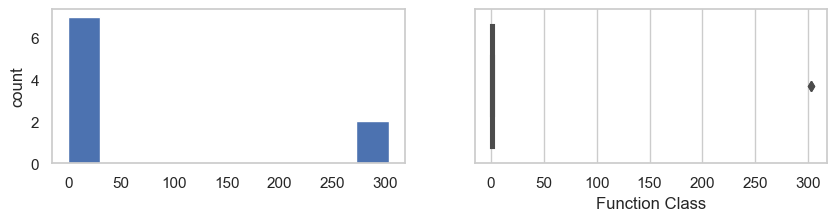

Typical Chest Pain


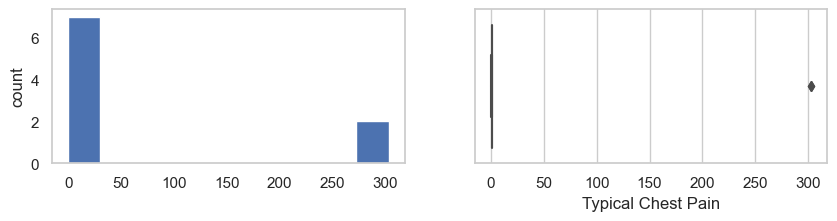

Edema


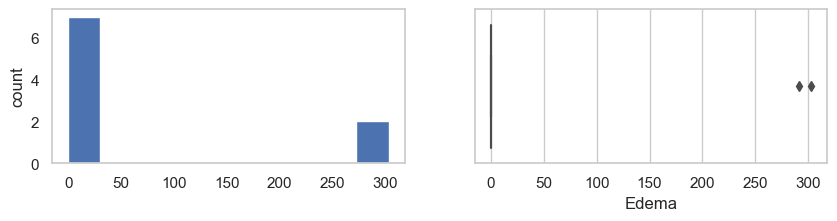

PR


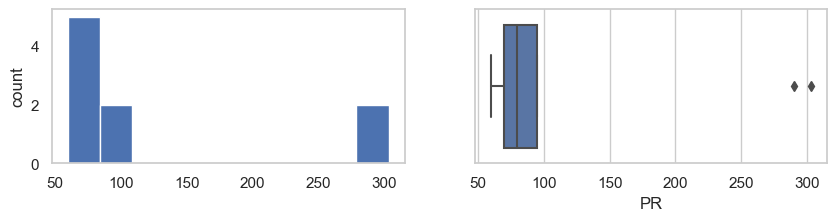

BP


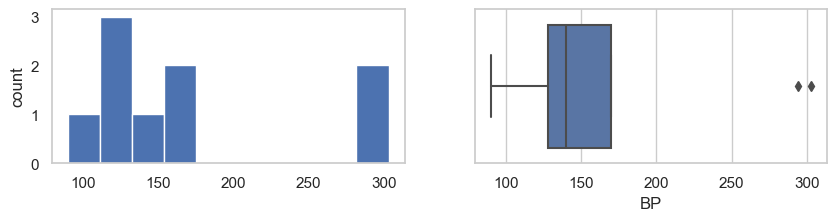

FH


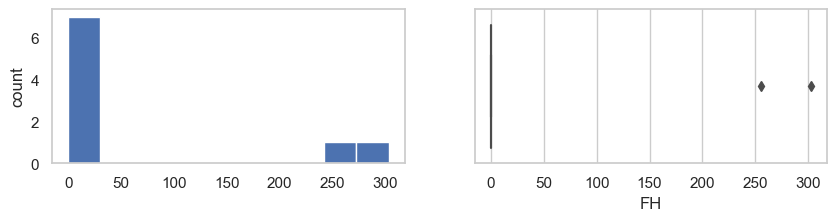

EX-Smoker


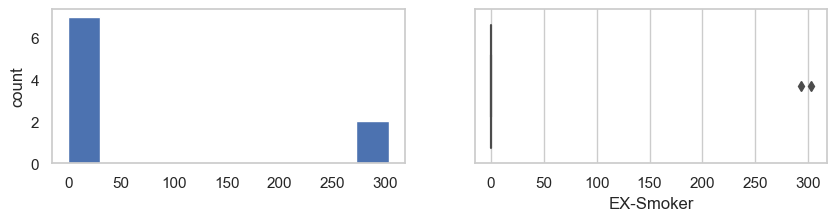

Current Smoker


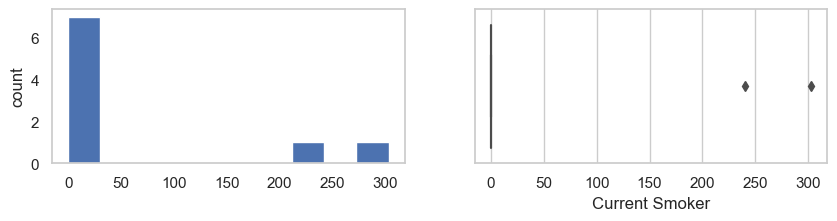

HTN


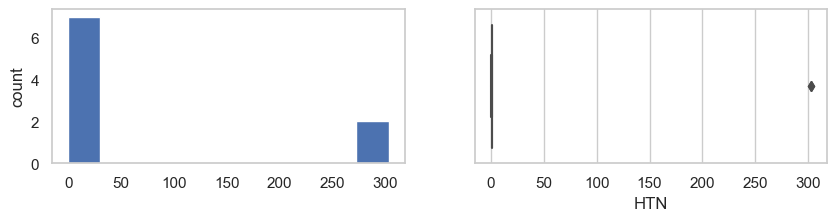

DM


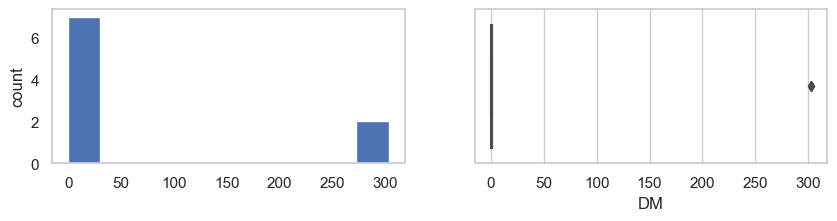

BMI


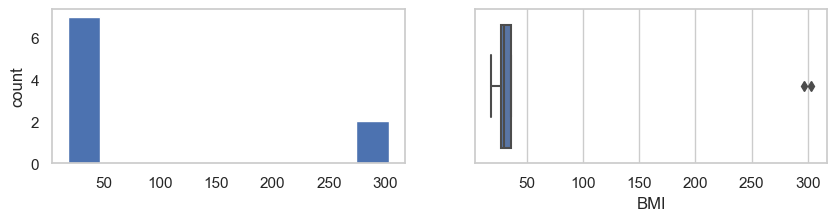

Length


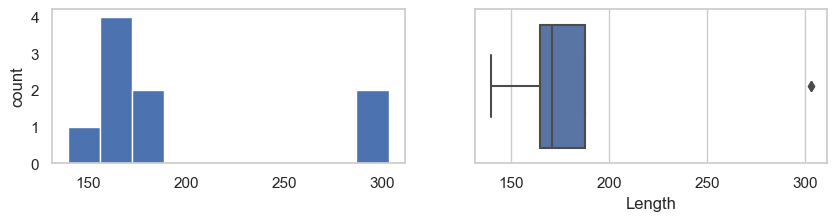

Region RWMA


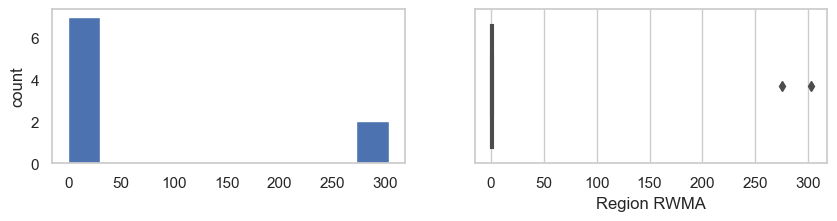

In [141]:
# disturubution with box_plot for all numerical features
for col in numerical_features:
    print(col)
    plt.figure(figsize = (10, 2))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

Age


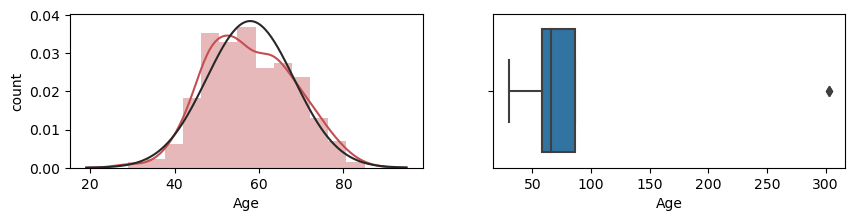

HB


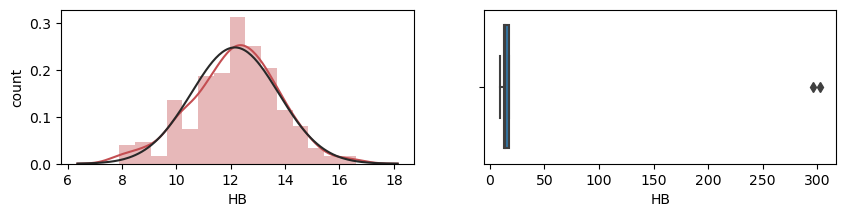

CR


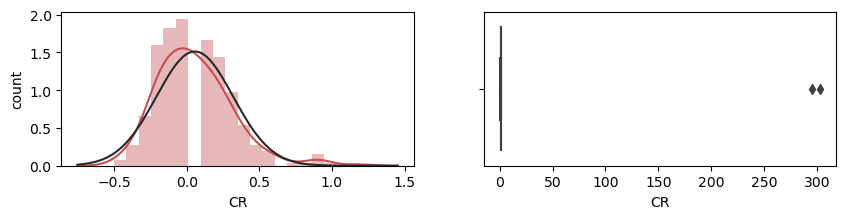

TG


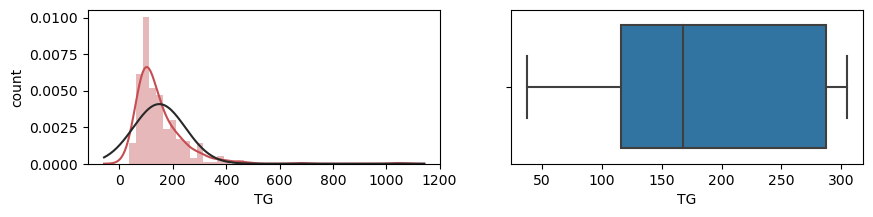

LDL


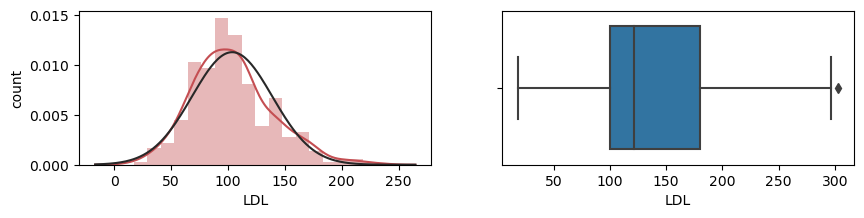

HDL


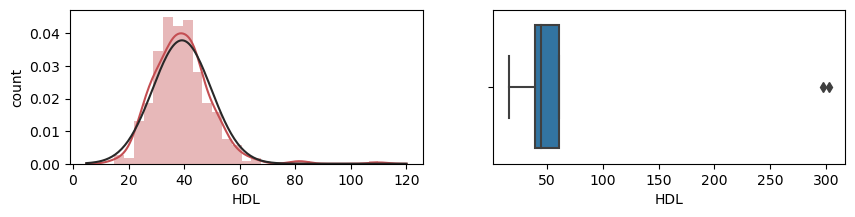

BUN


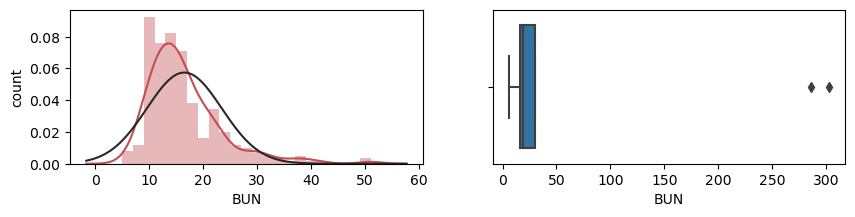

ESR


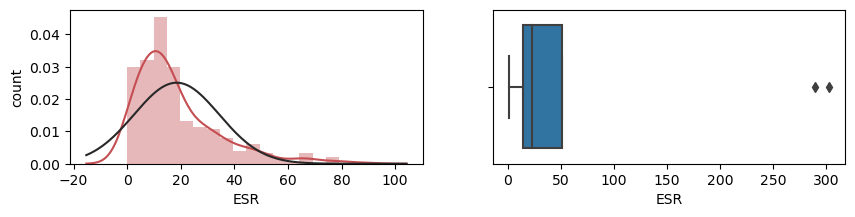

K


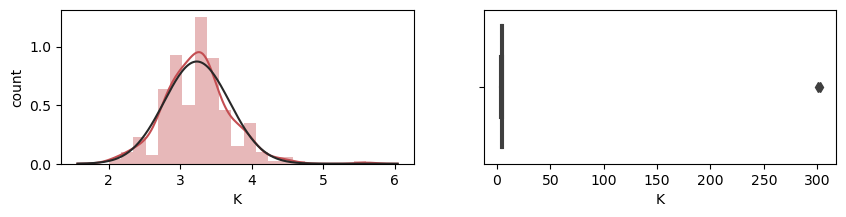

Weight


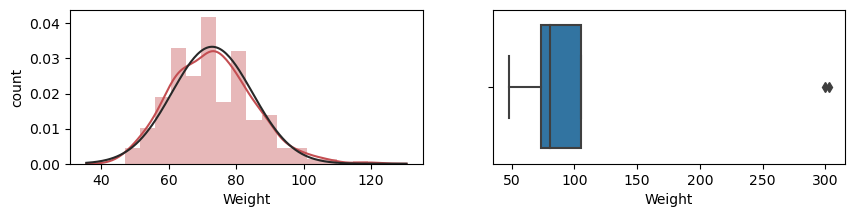

Na


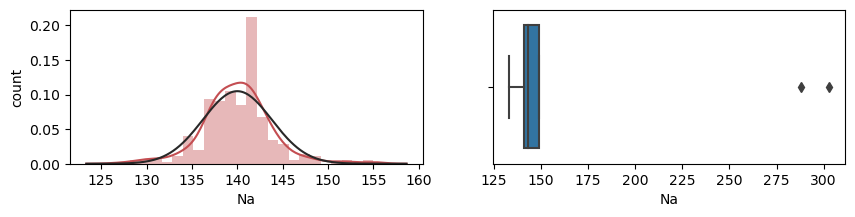

WBC


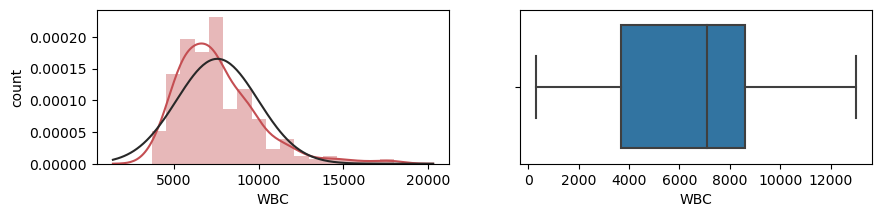

Lymph


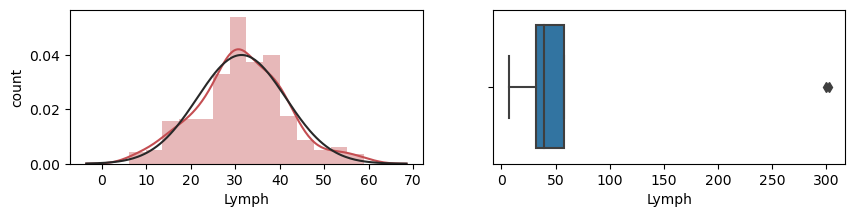

Neut


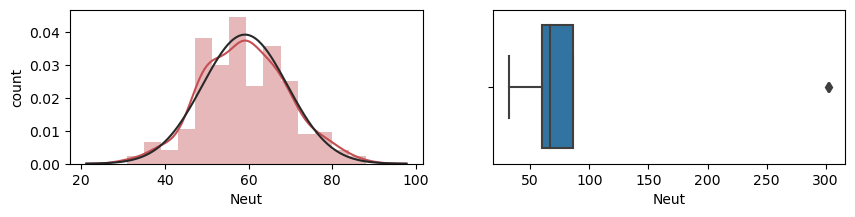

PLT


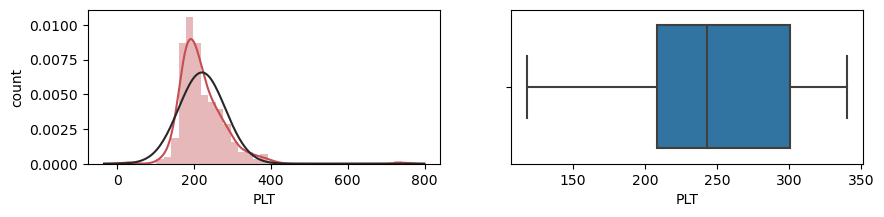

EF-TTE


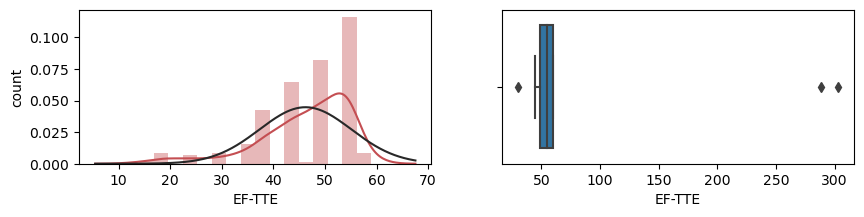

FBS


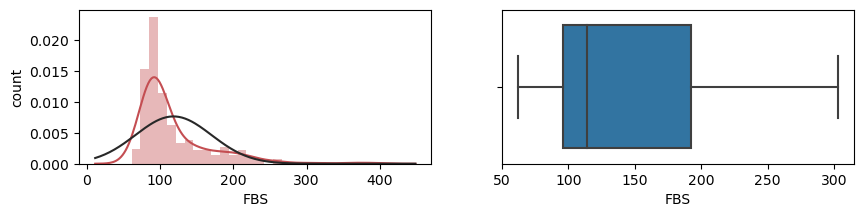

PR


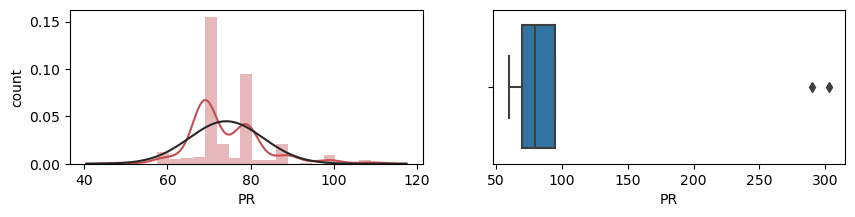

BP


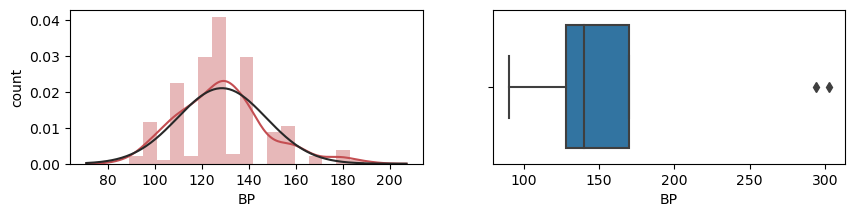

BMI


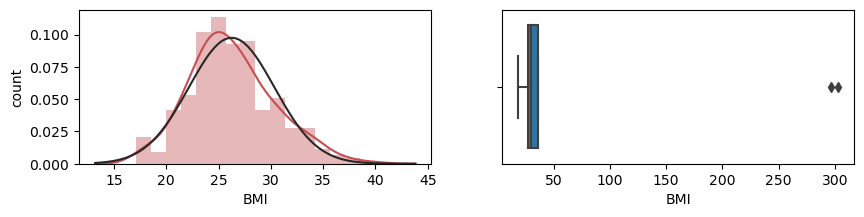

Length


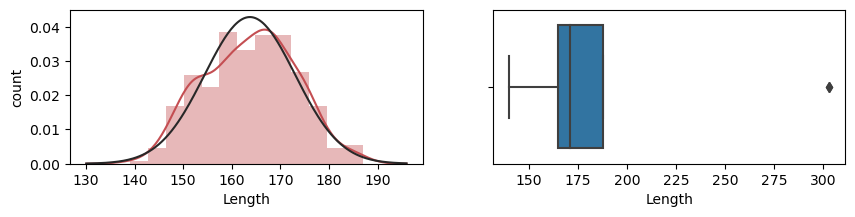

In [181]:
# checking whether the continuous_features following norm_dist
for col in continuous_feature:
    print(col)
    plt.figure(figsize = (10, 2))
    plt.subplot(1, 2, 1)
    Box_cox = st.boxcox(data[col],lmbda=1)
    sns.distplot(Box_cox,fit=norm, color ="r")
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

from the above diagrams, it shows that, some of the features are right and lef skewed, need to normalize those features <B> (TG, ,ESR, FBS, EF-TTE ) </B>

# outliers

In [175]:
# finding outliers in continuous_feature

def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

def outliers_columns(df):
    out={}
    for i in df:
        outliers = find_outliers_IQR(data[i])
        out[i]={'count':len(outliers),"max":outliers.max(),"min":outliers.min()}
    return out
out= outliers_columns(continuous_feature)
out = pd.DataFrame.from_dict(out)
out  

,Age,HB,CR,TG,LDL,HDL,BUN,ESR,K,Weight,Na,WBC,Lymph,Neut,PLT,EF-TTE,FBS,PR,BP,BMI,Length
count,0.0,7.0,8.0,16,6,6.0,17,13,2.0,3,15,9,3,1,11,15,30,13,9,6.000000,0.0
max,NaN,17.6,2.2,1050,232,111.0,52,90,6.6,120,156,18000,60,89,742,25,400,110,190,40.900658,NaN
min,NaN,8.9,1.7,309,190,64.0,31,55,5.6,108,128,14000,59,89,25,15,194,50,180,37.044745,NaN


In [176]:
outlier_columns = out.T[out.T['count']!=0].index

## Correlation


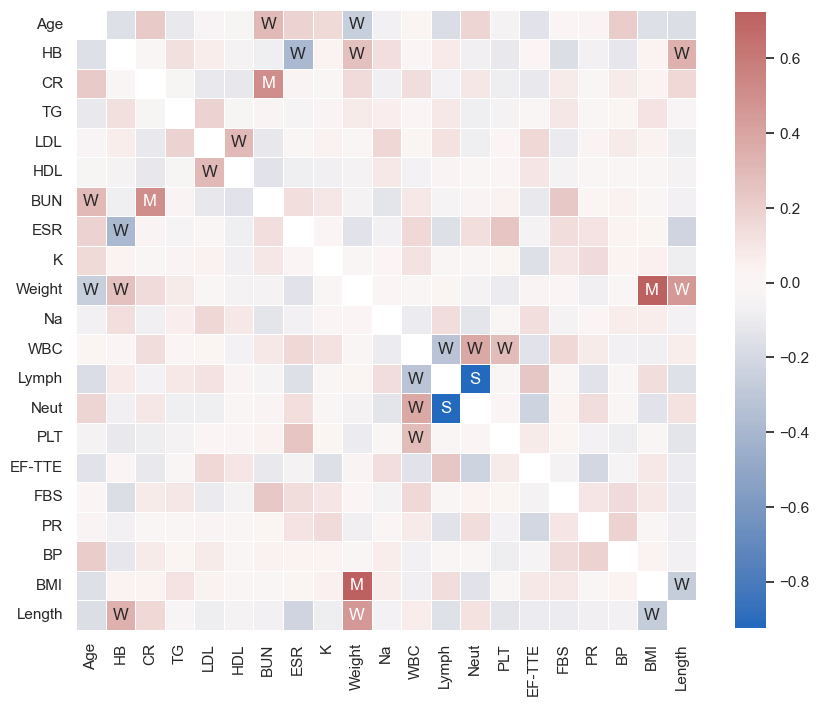

In [177]:
df_corr = data[continuous_feature].corr(method="pearson")

labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))
# Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, fmt='',annot=labels, linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

from the heatmap, it shows that <b> Lymph , Neut </b>, highly correlated with each other, remove any one column before modeling

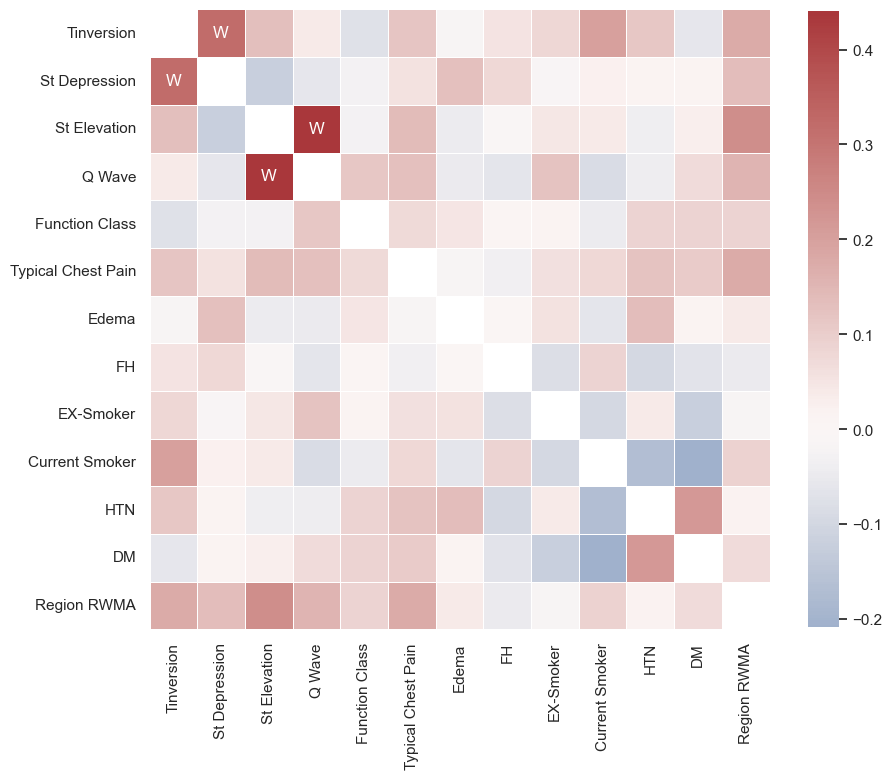

In [138]:
# discrete_feature

df_corr = data[discrete_feature].corr(method="spearman")

labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))
# Plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, fmt='',annot=labels,linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

almost all the continuous_feature almost follwing normal disturbution, after seeing the result if requried we can transform the data

In [ ]:
#bivaraite analysis with target colunm

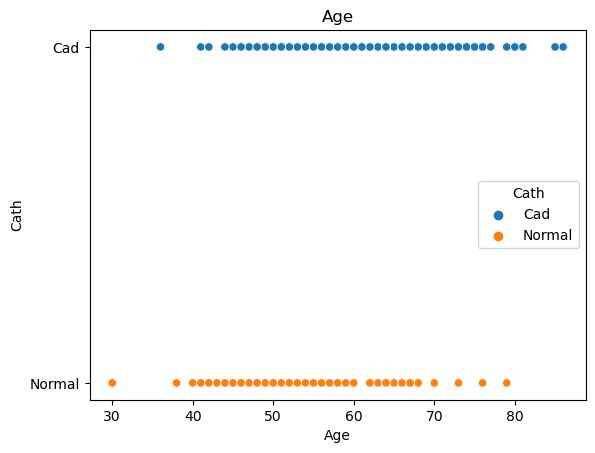

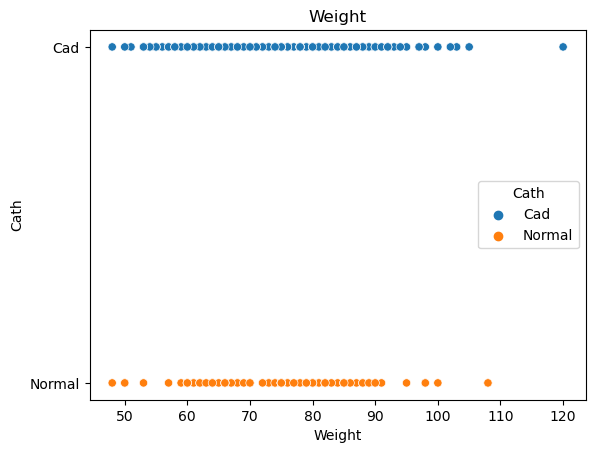

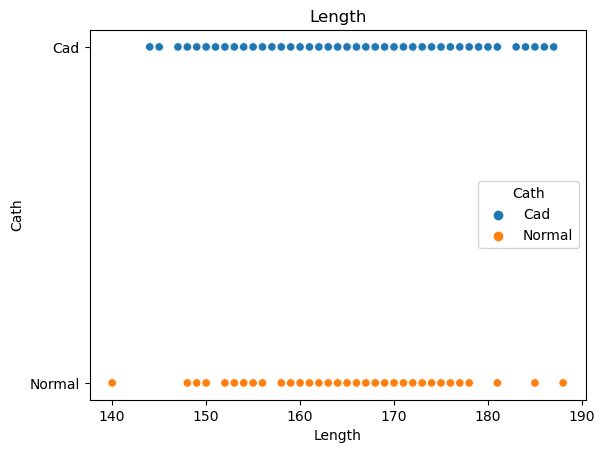

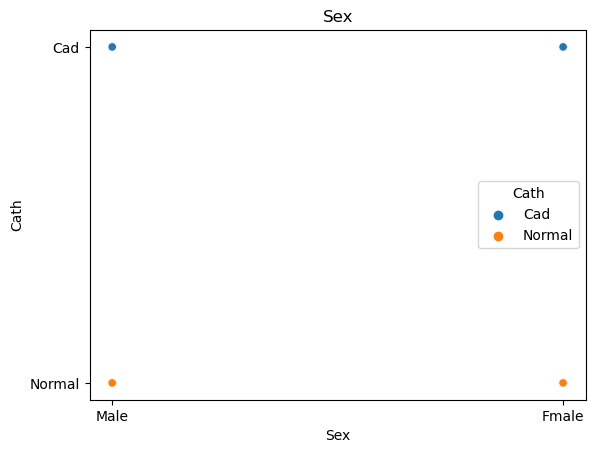

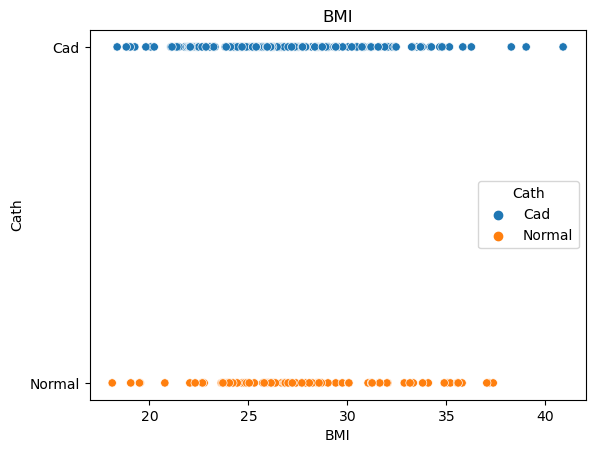

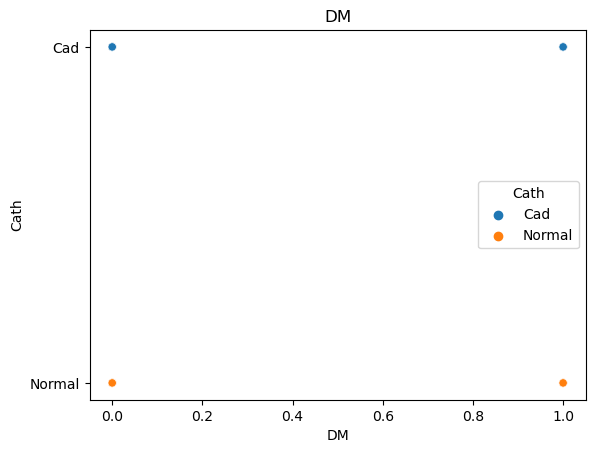

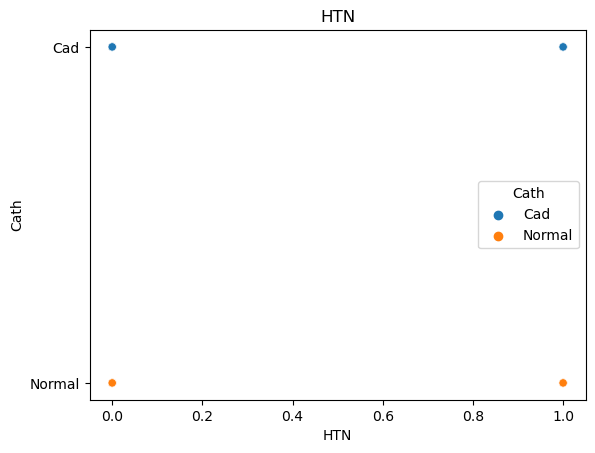

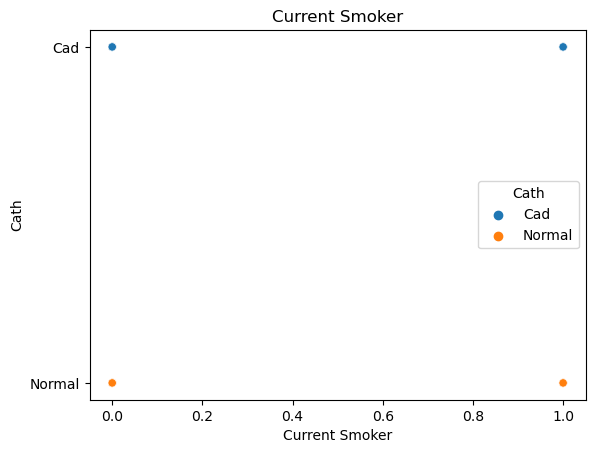

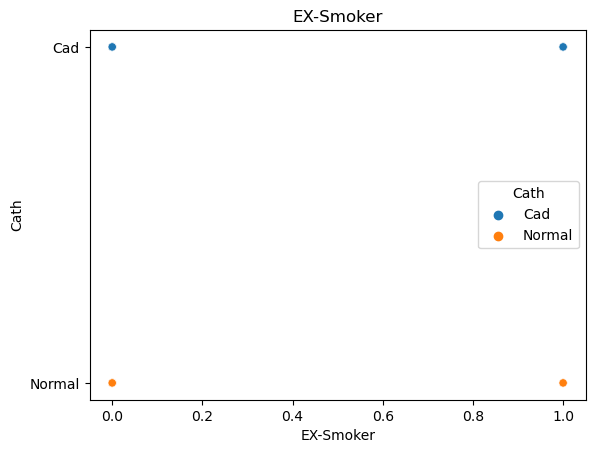

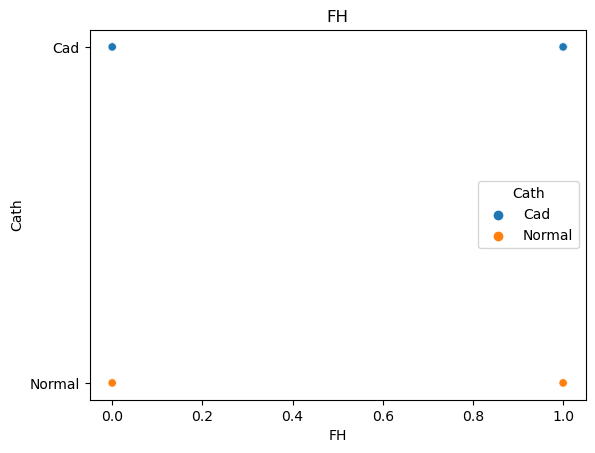

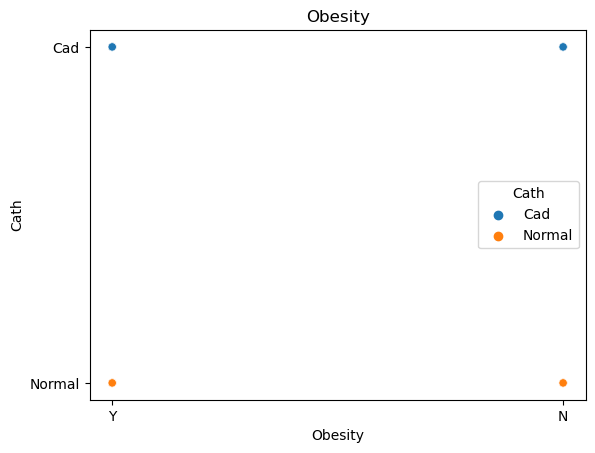

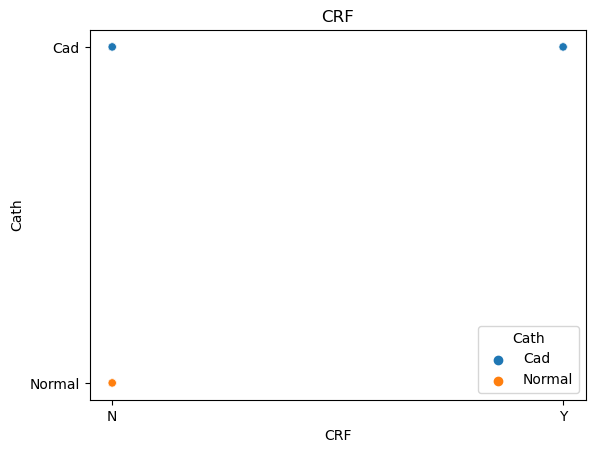

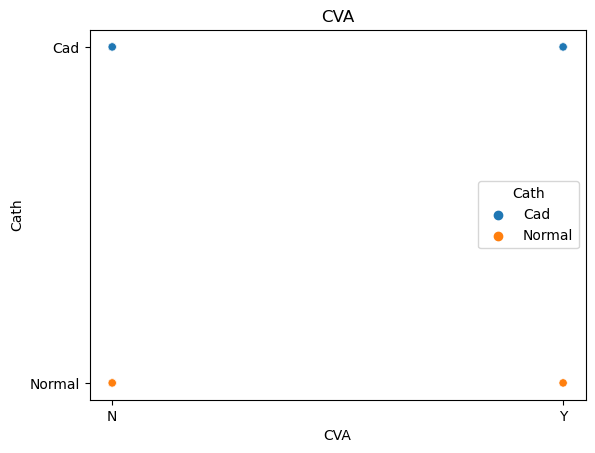

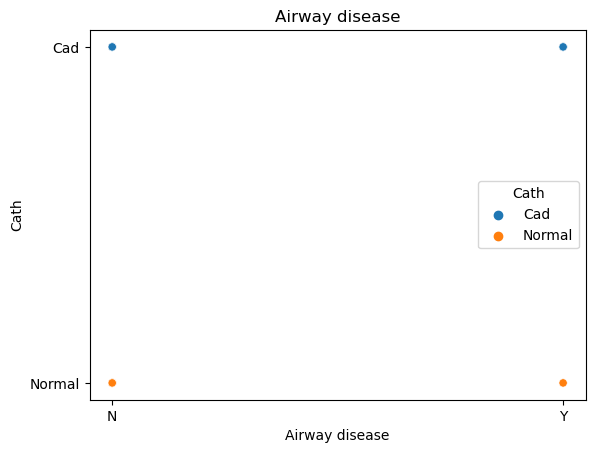

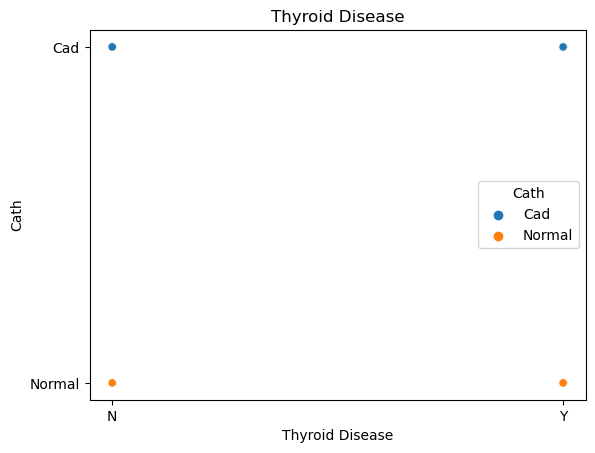

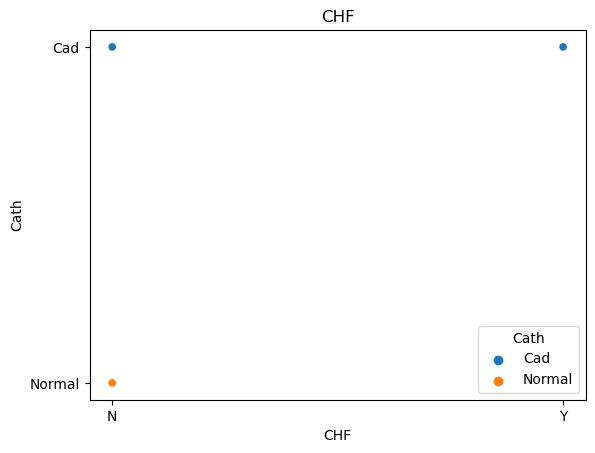

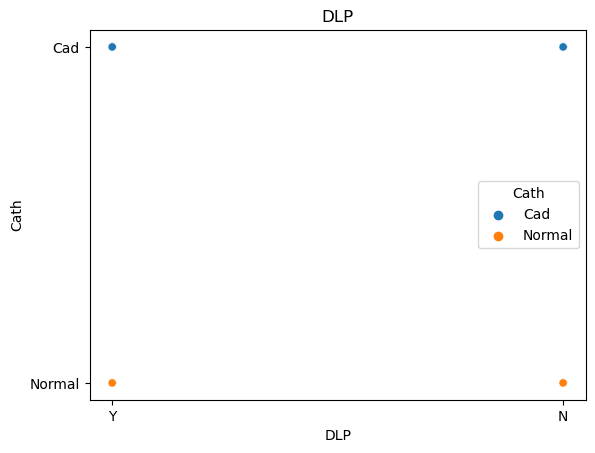

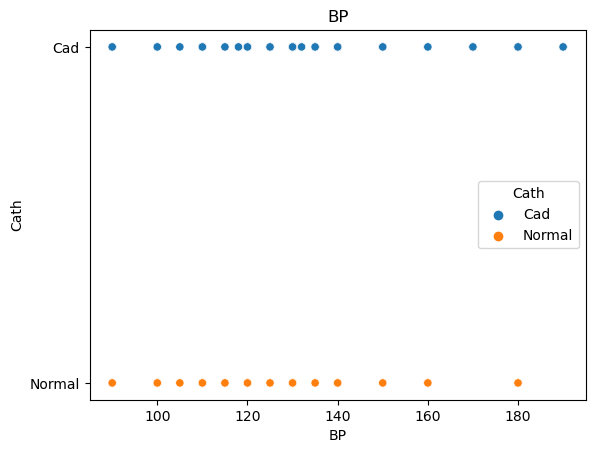

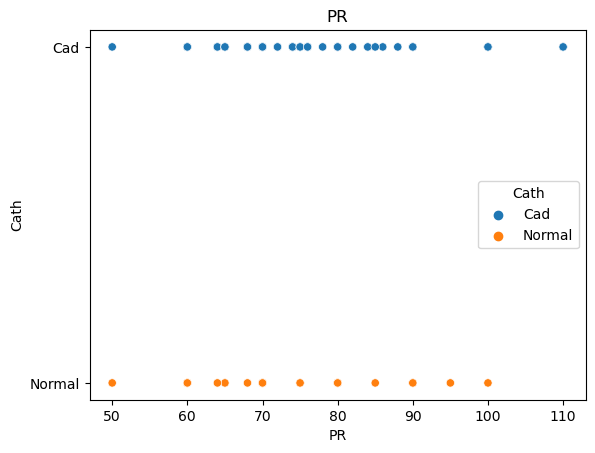

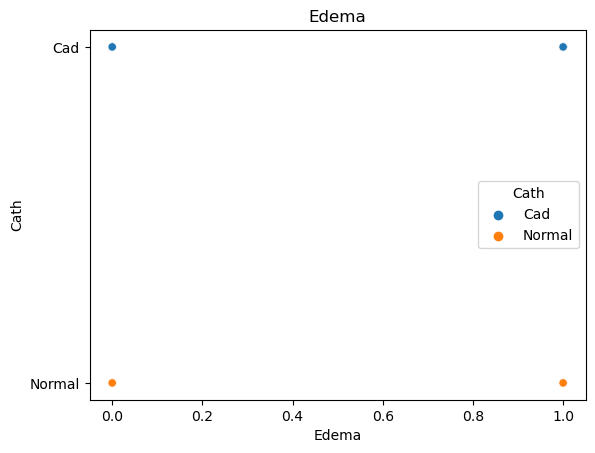

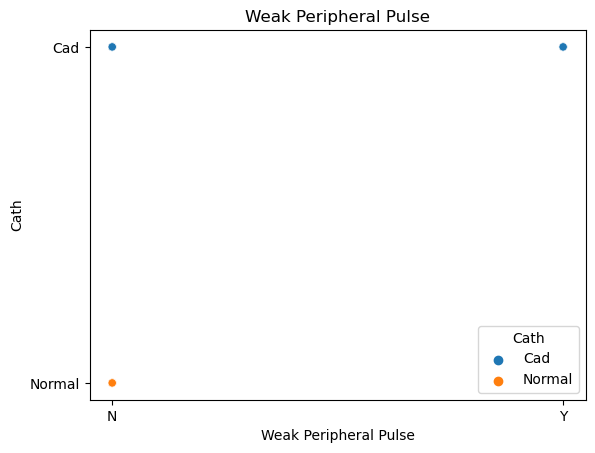

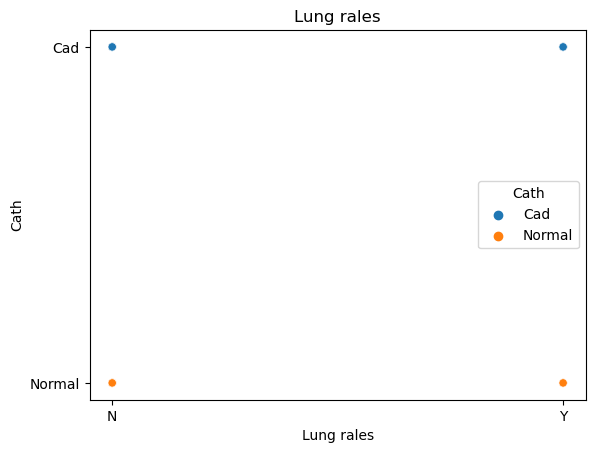

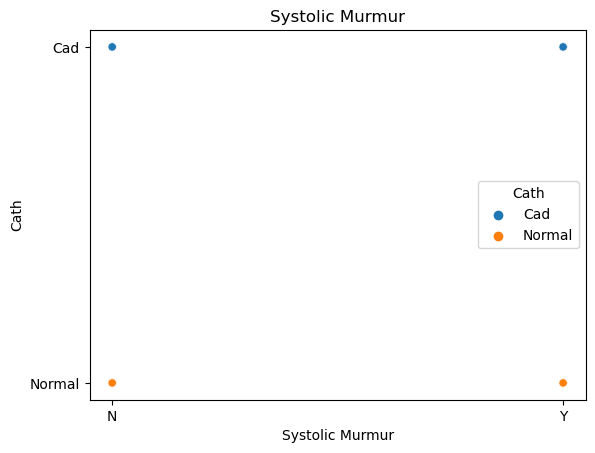

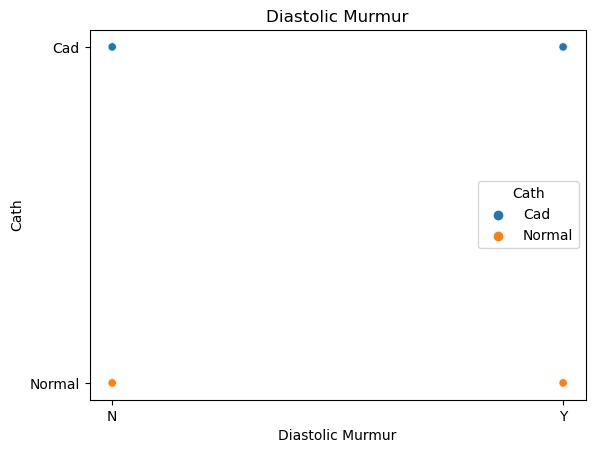

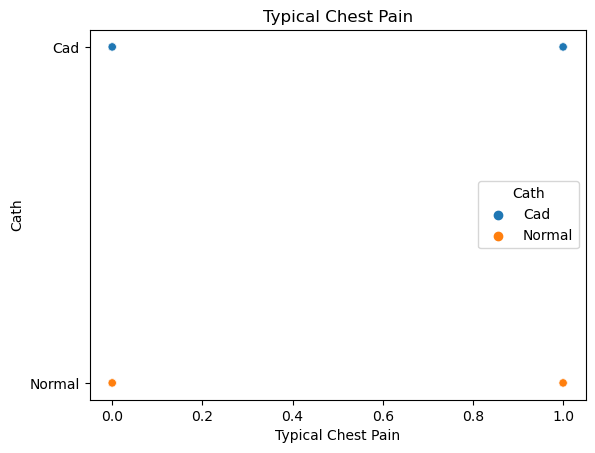

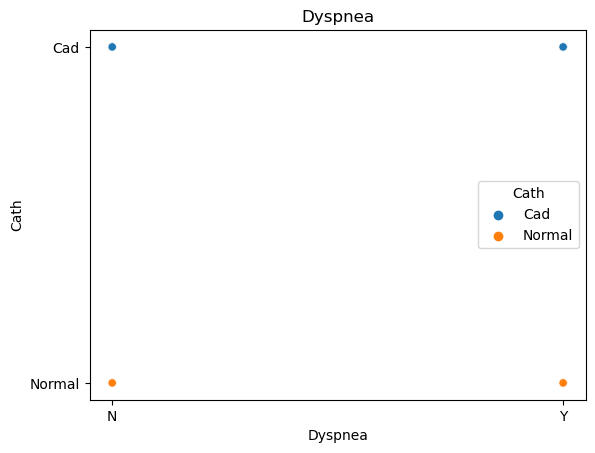

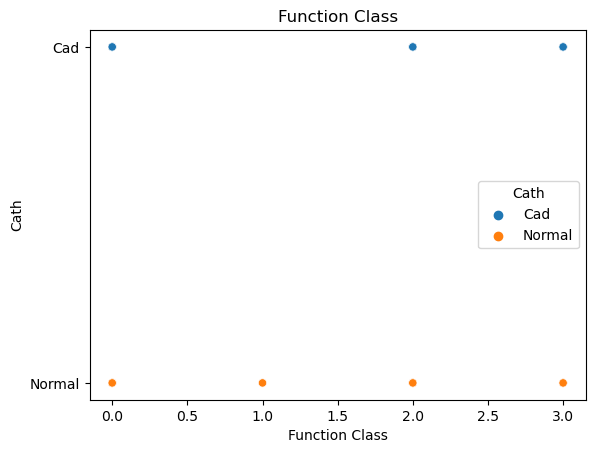

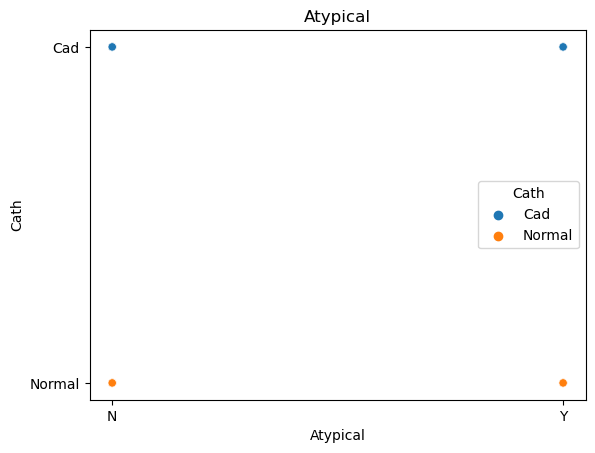

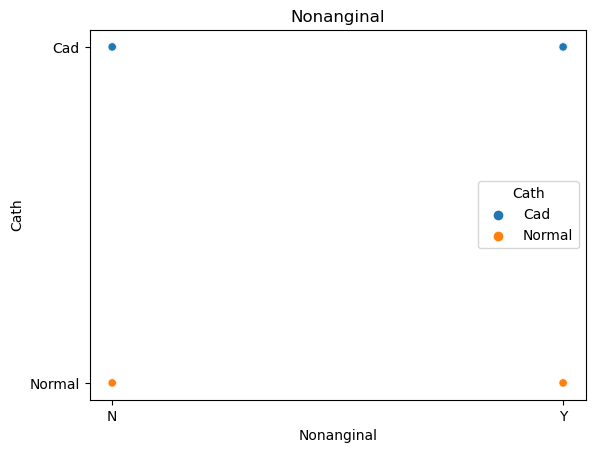

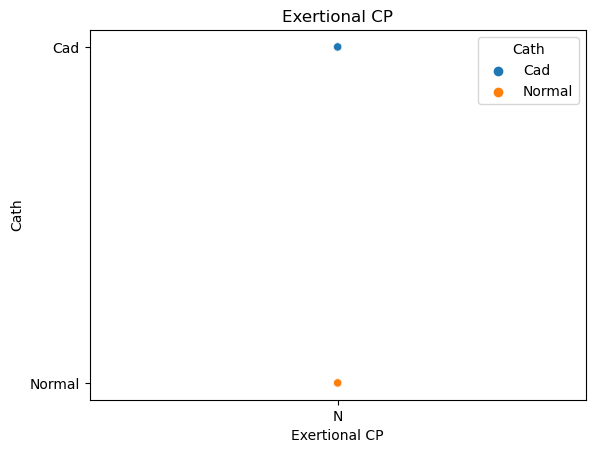

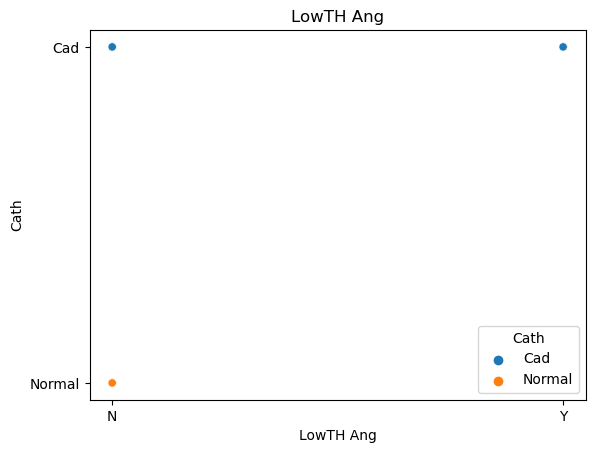

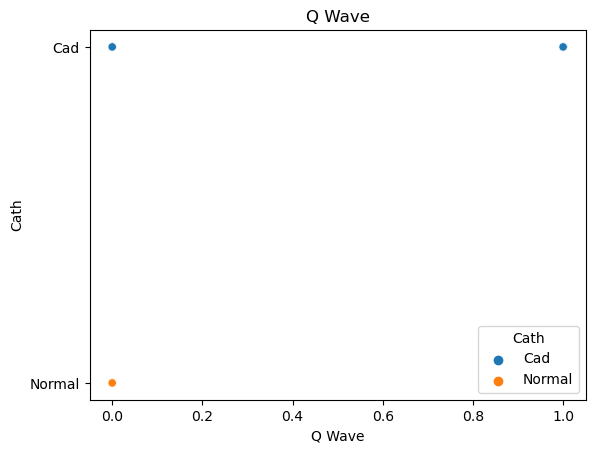

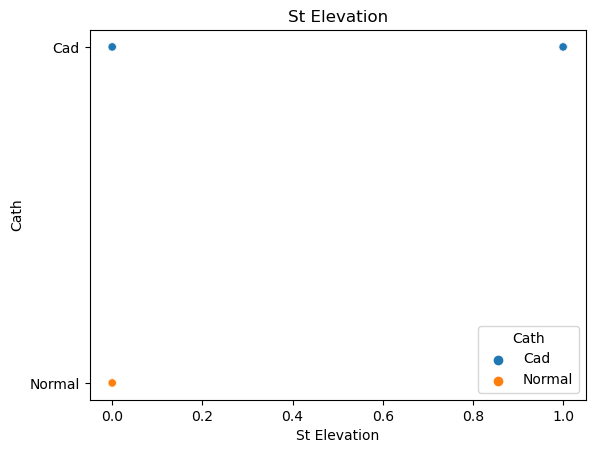

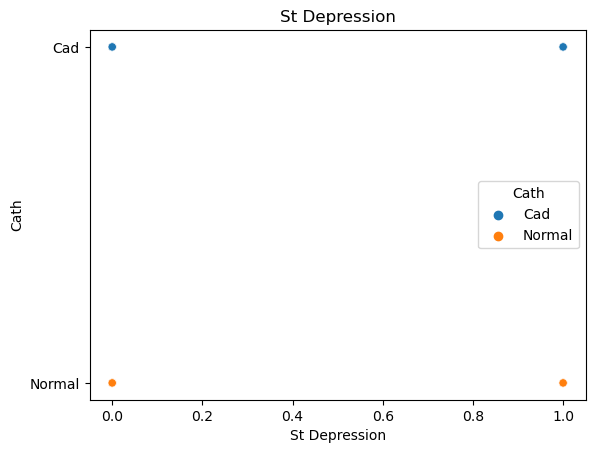

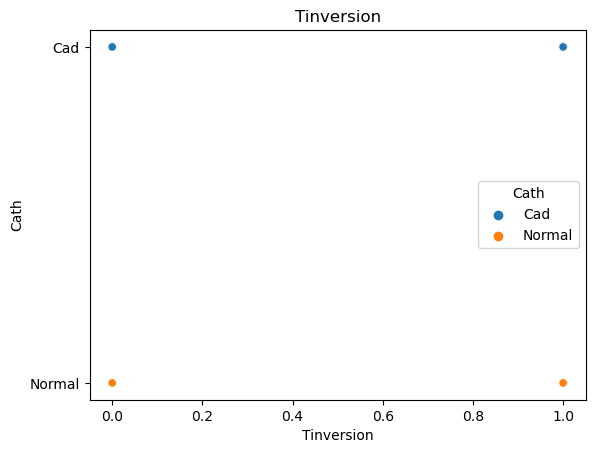

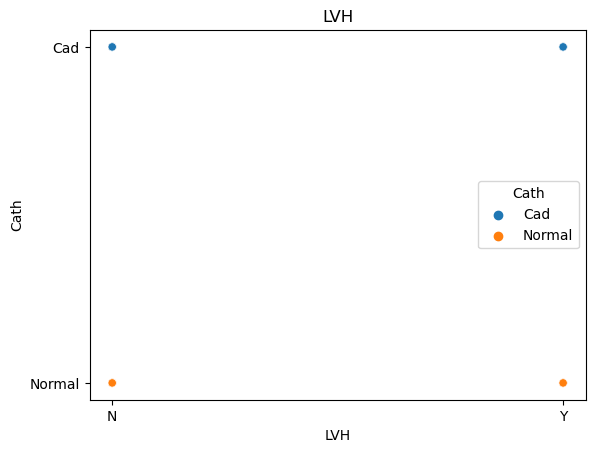

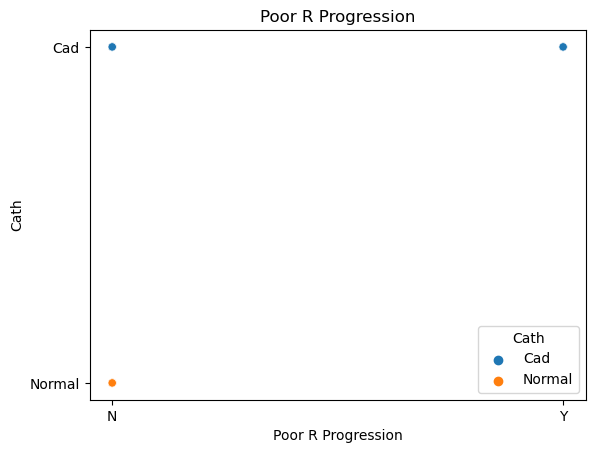

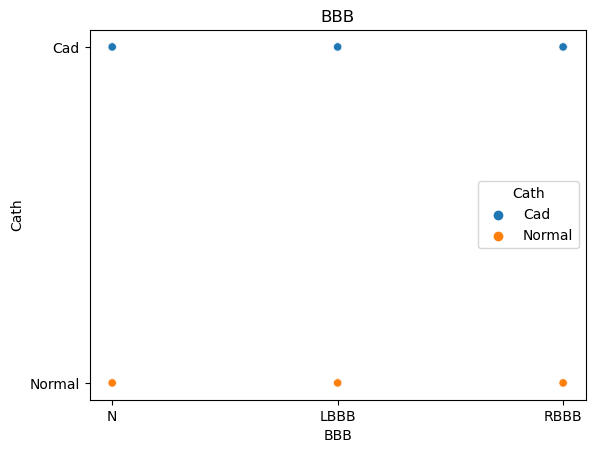

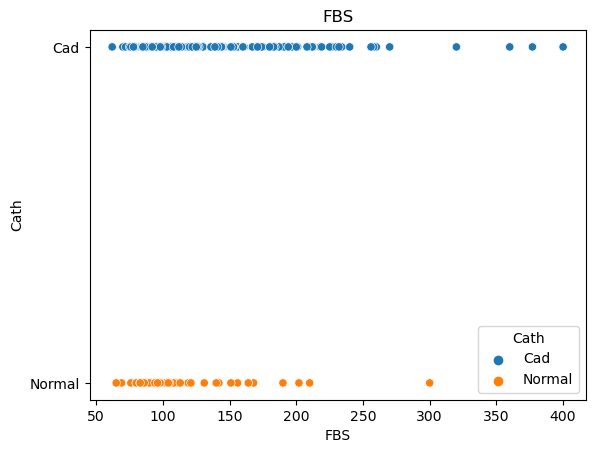

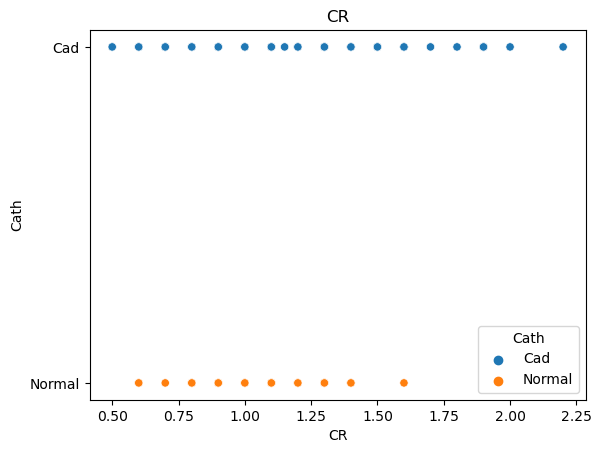

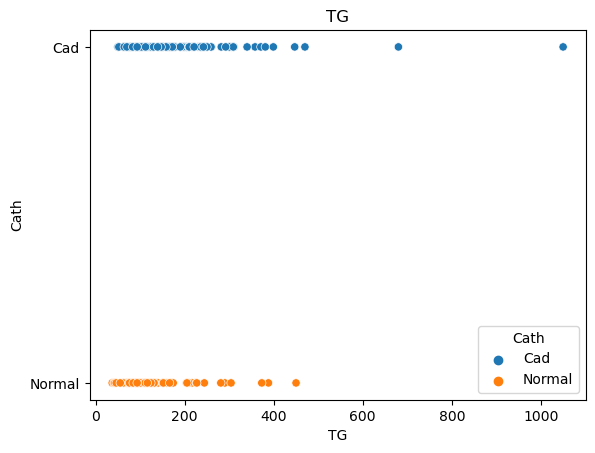

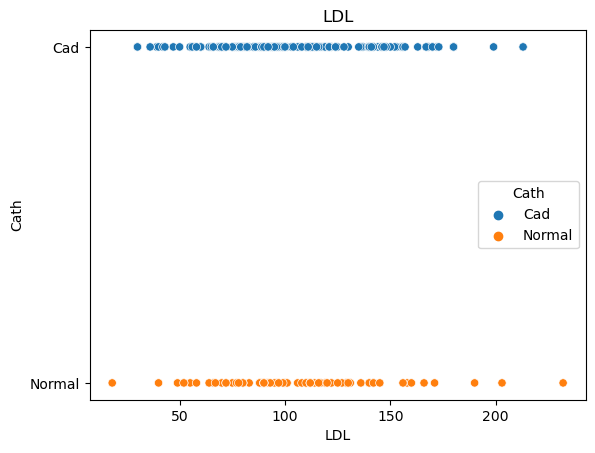

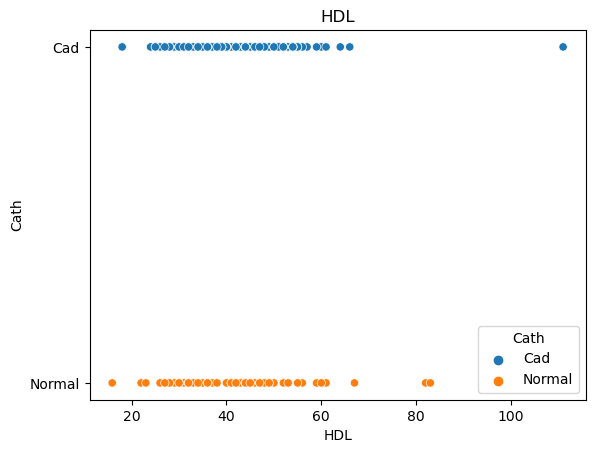

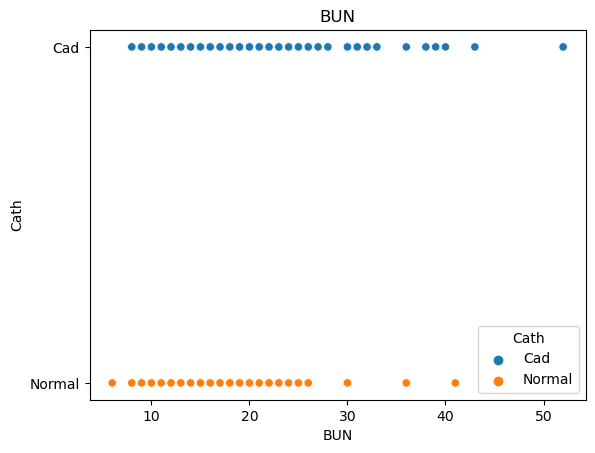

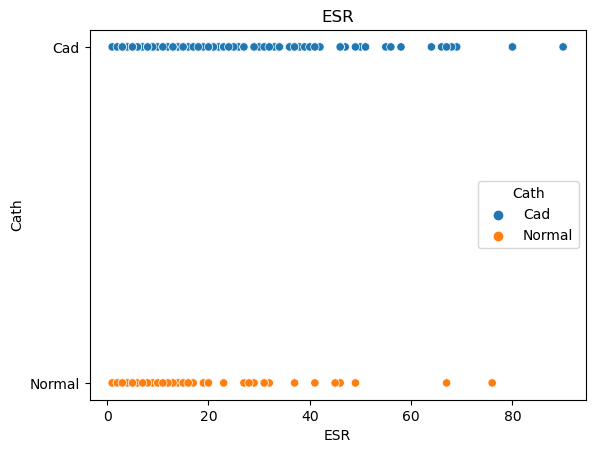

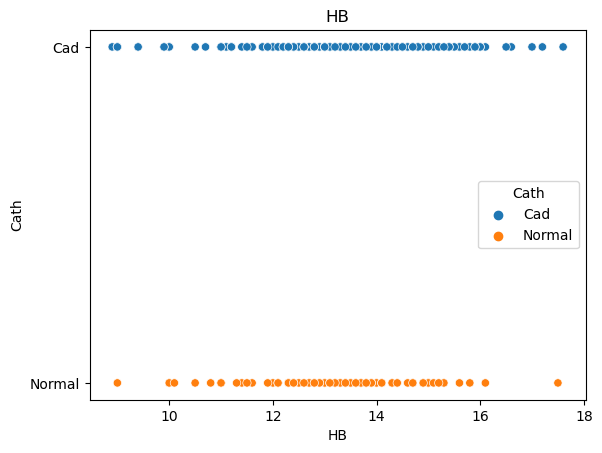

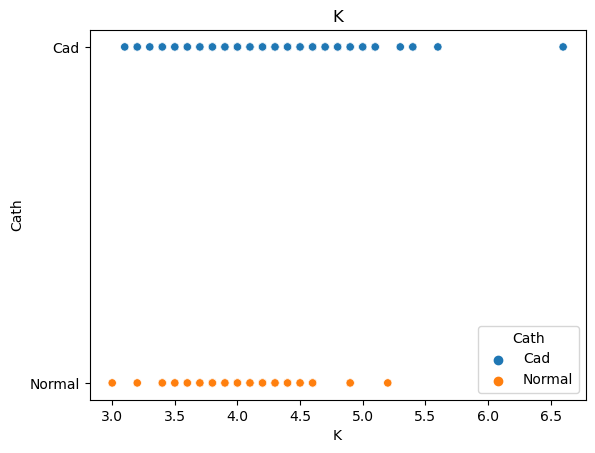

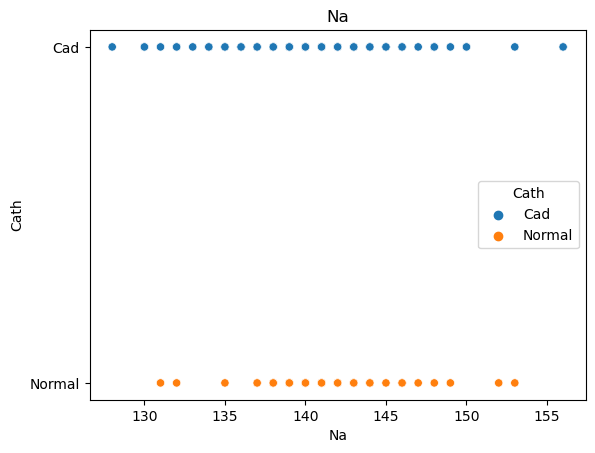

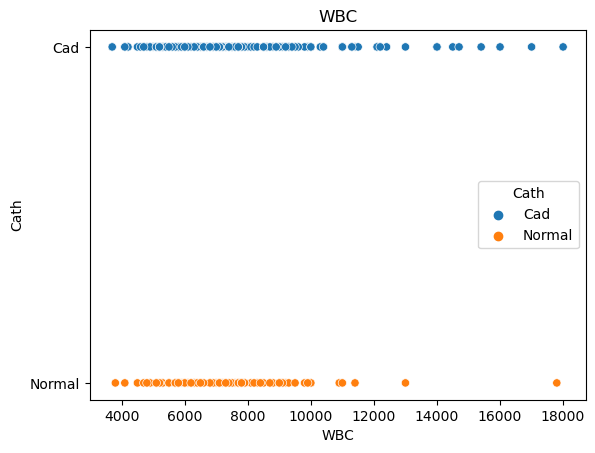

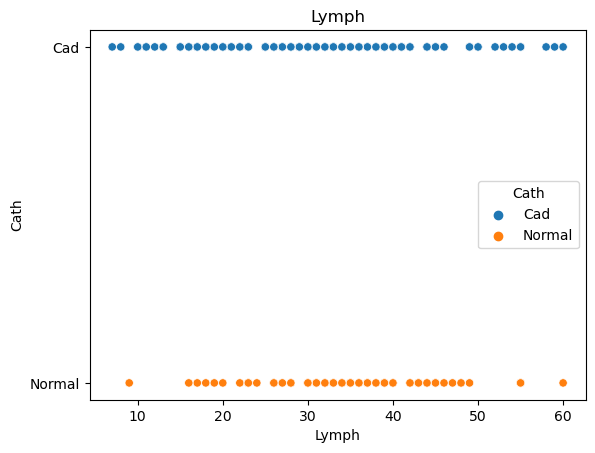

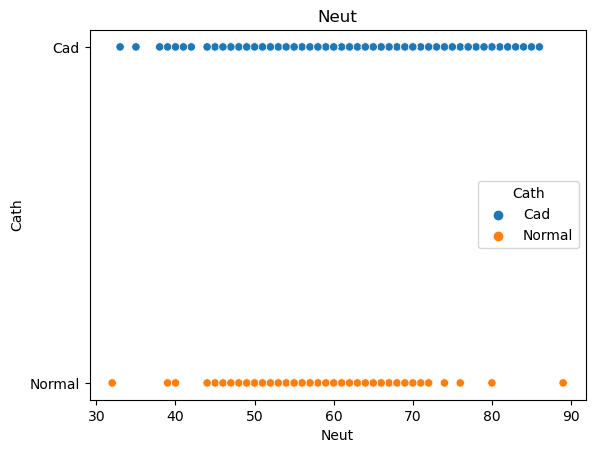

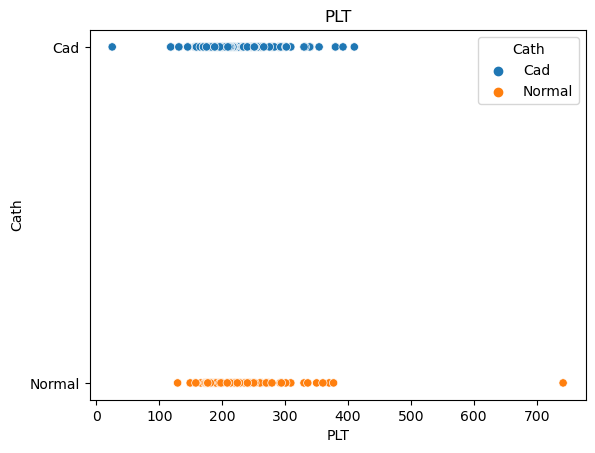

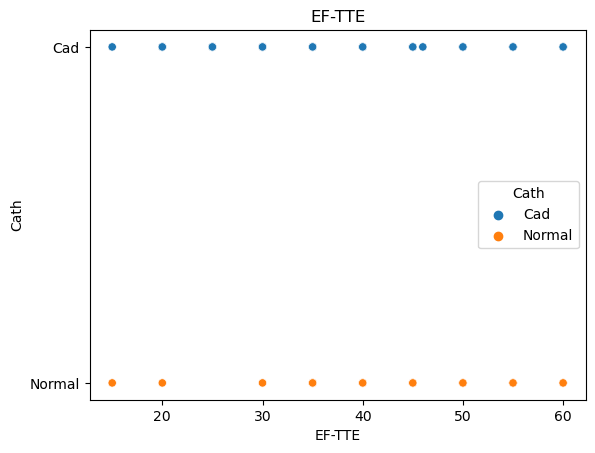

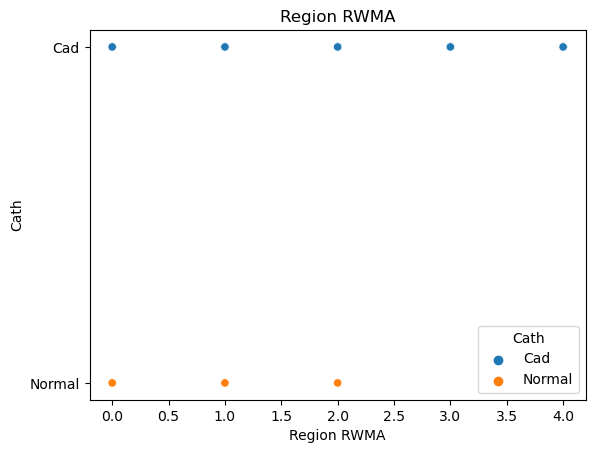

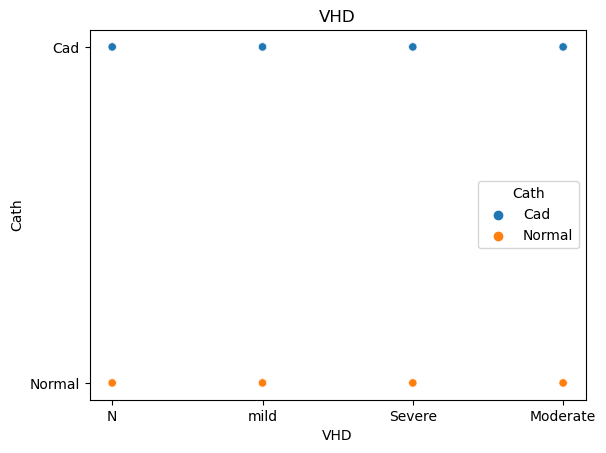

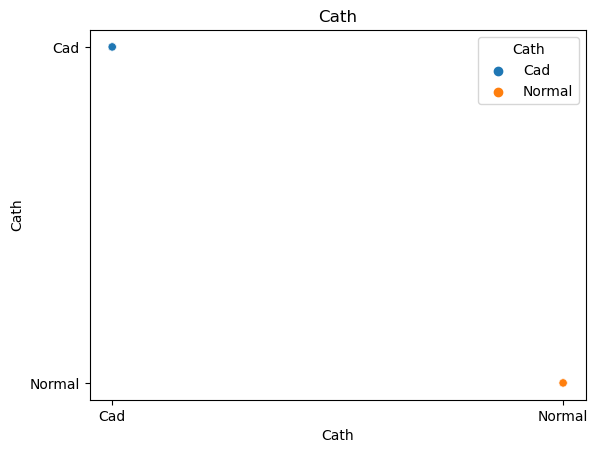

In [185]:
for i in data.columns:
    plt.title(i)
    sns.scatterplot(data=data, x=i, y='Cath', hue='Cath')
    plt.show()

In [204]:
data[data['Cath']=='Cad']['Age'].sort_values(ascending = False)

82     86
197    85
111    81
87     81
58     81
       ..
208    44
167    42
191    42
62     41
124    36
Name: Age, Length: 216, dtype: int64

In [206]:
data[data['Cath']=='Cad']['Length'].sort_values()

77     144
208    145
269    145
172    147
88     147
      ... 
62     183
157    184
144    185
40     186
131    187
Name: Length, Length: 216, dtype: int64

from the above analysis
  
1. Age between 36 to 86 are getting cad , Age below 36 are not getting cad
2. Length between 144 to 187 are getting cd  , lengh below 144 are not getting cad

# Applying the found insights in the dataframe

In [33]:
#spell correcting
data['Sex'] = data['Sex'].map({'Fmale':'female','Male':'male'})

In [34]:
data['Sex'].value_counts()

male      176
female    127
Name: Sex, dtype: int64

In [35]:
#droping zero_varaince feature
data = data.drop('Exertional CP', axis=1)

In [36]:
#droping high-correlated features
data = data.drop('Neut', axis=1)

In [87]:
#droping columns that having 98% of data points having the same value
remove_col =['CVA','CRF', 'CHF', 'Weak Peripheral Pulse']
data = data.drop(remove_col,axis=1,inplace=True)

In [37]:
data[(data['VHD']=='N') & (data['BBB']=='N')][['Cath']].value_counts()

Cath  
Cad       74
Normal    38
dtype: int64

value N in columns <b>VHD, BBB </b> are playing vital role to classfiy cad, so we are not <b>deidentiy</b> those columns

In [38]:
#handling outliers

In [39]:
outlier_data = df.T[df.T['upd_count']!= df.T['orig_count']][['95%']].T

In [40]:
for i in outlier_data.columns:
    try:
        for j in data[i]:
            if j> outlier_data[i][0]:
                data[i].replace(j,outlier_data[i][0],inplace=True)
    except:
        pass

In [41]:
def outliers_columns(df):
    out={}
    
    for i in df:
        try:
            outliers = find_outliers_IQR(data[i])
            out[i]={'count':len(outliers),"max":outliers.max(),"min":outliers.min()}
        except:
            pass
    return out
out= outliers_columns(continuous_feature)
out = pd.DataFrame.from_dict(out)
out  

,Age,HB,CR,TG,LDL,HDL,BUN,ESR,K,Weight,Na,WBC,Lymph,PLT,EF-TTE,FBS,PR,BP,BMI,Length
count,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,0.0,1.0,15,0.0,2,0.0,0.0,0.0
max,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132,NaN,NaN,25.0,25,NaN,50,NaN,NaN,NaN
min,NaN,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,128,NaN,NaN,25.0,15,NaN,50,NaN,NaN,NaN


replaced the outlier with the <b> 95 percentile value (upper cap value) </b>